# Part 1/4

# IMPORTING ALL THE NECESSARY PYTHON LIBRARIES/PACKAGES

In [0]:
from pyspark.sql import SparkSession # Importing SparkSession is not necessary if working in Databricks
from pyspark.sql.functions import col, desc, count, hour, minute, expr
from pyspark.sql.functions import udf, explode, when, coalesce, asc
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql.types import TimestampType, LongType, StringType, ArrayType
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime

## IMPORTING AND LOADING THE JSON FILES AS SPARK DATAFRAME

In [0]:
# THIS PARTICULAR Cmd IS USED TO IMPORT THE DIFFERENT JSON FILES AVAILABLE IN THE SPECIFIED DIRECTORY, COMBINE THEM AND LOAD THEM AS A SINGLE SPARK DATAFRAME IN DATABRICKS.
# THEREFORE EXECUTE THE BELOW CODE IF YOU ARE USING DATABRICKS ELSE PLEASE EXECUTE combining_data.ipynb TO GET THE COMBINED DATA.

# Path
container_path = "/FileStore/tables/" # COMMENT OUT THIS LINE IF YOU UNCOMMENT THE ABOVE LINES

# List all files available in the path
files = dbutils.fs.ls(container_path)

# Extracting the JSON file names
json_files = [file.name for file in files if file.name.endswith(".json")]

# Loading the JSON files into a list of DataFrames
dfs = []
for json_file in json_files:
    file_path = container_path + json_file
    df = spark.read.json(file_path)
    dfs.append(df)

# Combining the DataFrames
combined_df = dfs[0]
for df in dfs[1:]:
    combined_df = combined_df.union(df)

In [0]:
# UNCOMMENT AND EXECUTE THIS CODE IF YOU ARE USING JUPYTER NOTEBOOK OR ANY OTHER LOCAL IDE/IDLE.

# import os

# directory = os.getcwd()

# container_path = directory + "/raw/"

# # Create the Spark session
# spark = SparkSession.builder.getOrCreate()

# # Read the combined JSON data as a Spark DataFrame
# combined_json_path = os.path.join(container_path, "combined_data.json")
# spark_df = spark.read.json(combined_json_path)

In [0]:
display(combined_df.limit(5))

actor created_at id org payload public repo type List(https://avatars.githubusercontent.com/u/665991?, , 665991, petroav, https://api.github.com/users/petroav) 2015-01-01T15:00:00Z 2489651045 null List(null, null, null, null, Solution to homework and assignments from MIT's 6.828 (Operating Systems Engineering). Done in my spare time., null, null, null, null, master, null, null, null, null, null, user, master, branch, null, null) true List(28688495, petroav/6.828, https://api.github.com/repos/petroav/6.828) CreateEvent List(https://avatars.githubusercontent.com/u/3854017?, , 3854017, rspt, https://api.github.com/users/rspt) 2015-01-01T15:00:01Z 2489651051 null List(null, 437c03652caa0bc4a7554b18d5c0a394c2f3d326, null, List(List(List(5c682c2d1ec4073e277f9ba9f4bdf07e5794dabe@rspt.ch, rspt), true, Fix main header height on mobile, 6b089eb4a43f728f0a594388092f480f2ecacfcd, https://api.github.com/repos/rspt/rspt-theme/commits/6b089eb4a43f728f0a594388092f480f2ecacfcd)), null, 1, null, 6b089eb4a43f728f0a594388092f480f2ecacfcd, null, null, null, null, null, null, 536863970, null, refs/heads/master, null, null, 1) true List(28671719, rspt/rspt-theme, https://api.github.com/repos/rspt/rspt-theme) PushEvent List(https://avatars.githubusercontent.com/u/6339799?, , 6339799, izuzero, https://api.github.com/users/izuzero) 2015-01-01T15:00:01Z 2489651053 null List(null, 590433109f221a96cf19ea7a7d9a43ca333e3b3e, null, List(List(List(df05f55543db3c62cf64f7438018ec37f3605d3c@gmail.com, Eunsoo Lee), true, #20 게시글 및 댓글 삭제 시 새로고침이 되는 문제 해결

원래 의도는 새로고침이 되지 않고 확인창만으로 해결되어야 함.
기본 게시판 대응 플러그인에서 발생한 이슈., ec819b9df4fe612bb35bf562f96810bf991f9975, https://api.github.com/repos/izuzero/xe-module-ajaxboard/commits/ec819b9df4fe612bb35bf562f96810bf991f9975)), null, 1, null, ec819b9df4fe612bb35bf562f96810bf991f9975, null, null, null, null, null, null, 536863972, null, refs/heads/develop, null, null, 1) true List(28270952, izuzero/xe-module-ajaxboard, https://api.github.com/repos/izuzero/xe-module-ajaxboard) PushEvent List(https://avatars.githubusercontent.com/u/6894991?, , 6894991, SametSisartenep, https://api.github.com/users/SametSisartenep) 2015-01-01T15:00:03Z 2489651057 List(https://avatars.githubusercontent.com/u/9285252?, , 9285252, visionmedia, https://api.github.com/orgs/visionmedia) List(started, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null) true List(2871998, visionmedia/debug, https://api.github.com/repos/visionmedia/debug) WatchEvent List(https://avatars.githubusercontent.com/u/485033?, , 485033, winterbe, https://api.github.com/users/winterbe) 2015-01-01T15:00:03Z 2489651062 null List(null, 0fef99f604154ccfe1d2fcd0aadeffb5c58e43ff, null, List(List(List(52a47bffd52d9cea1ee1362f2bd0c5f87fac9262@googlemail.com, Benjamin Winterberg), true, Add comparator support for min, max operations, 15b303203be31bd295bc831075da8f74b99b3981, https://api.github.com/repos/winterbe/streamjs/commits/15b303203be31bd295bc831075da8f74b99b3981)), null, 1, null, 15b303203be31bd295bc831075da8f74b99b3981, null, null, null, null, null, null, 536863975, null, refs/heads/master, null, null, 1) true List(28593843, winterbe/streamjs, https://api.github.com/repos/winterbe/streamjs) PushEvent

#### Checking the data types and changing them into correct type

In [0]:
combined_df.printSchema()

root
 |-- actor: struct (nullable = true)
 |    |-- avatar_url: string (nullable = true)
 |    |-- gravatar_id: string (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- login: string (nullable = true)
 |    |-- url: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- id: string (nullable = true)
 |-- org: struct (nullable = true)
 |    |-- avatar_url: string (nullable = true)
 |    |-- gravatar_id: string (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- login: string (nullable = true)
 |    |-- url: string (nullable = true)
 |-- payload: struct (nullable = true)
 |    |-- action: string (nullable = true)
 |    |-- before: string (nullable = true)
 |    |-- comment: struct (nullable = true)
 |    |    |-- _links: struct (nullable = true)
 |    |    |    |-- html: struct (nullable = true)
 |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |-- pull_request: struct (nullable = true)
 |    |    |    |    |-- href: strin

In [0]:
combined_df = combined_df.withColumn("created_at", col("created_at").cast(TimestampType()))
combined_df = combined_df.withColumn("id", col("id").cast(LongType()))

#### CREATING FUNCTIONS

In [0]:
# Function to normalize spark dataframe
def normalization_function(dataframe, column_name):
    # Getting the field names dynamically
    field_names = dataframe.select(f"{column_name}.*").columns

    # Select the fields using dot notation dynamically
    func_df = dataframe.select([col(f"{column_name}." + field_name).alias(field_name) for field_name in field_names])
    return func_df

# Function to check the total rows and columns of a dataframe
def dimension_check(dataframe):
    num_rows = dataframe.count()
    num_columns = len(dataframe.columns)
    return num_rows, num_columns

#### SORTING EVENT OCCURRENCES

In [0]:
# Extract the "type" column and count occurrences
c_event_count = combined_df.groupby("type").agg(count("*").alias("count"))
sorted_c_event_count = c_event_count.orderBy(desc("count"))

## NORMALIZATION OF THE ORIGINAL TABLE/DATAFRAME

In [0]:
# Extracting the actor column and converting it into a dataframe
actor_df = normalization_function(combined_df, "actor")

org_df = normalization_function(combined_df, "org")

repo_df = normalization_function(combined_df, "repo")

payload_df = normalization_function(combined_df, "payload")

# DISPLAYING THE NORMALIZED DATA

### ACTOR DATAFRAME

In [0]:
# Displaying the actor dataframe and its total rows x columns
display(actor_df.limit(20))
dimension_check(actor_df)

avatar_url gravatar_id id login url https://avatars.githubusercontent.com/u/665991? 665991 petroav https://api.github.com/users/petroav https://avatars.githubusercontent.com/u/3854017? 3854017 rspt https://api.github.com/users/rspt https://avatars.githubusercontent.com/u/6339799? 6339799 izuzero https://api.github.com/users/izuzero https://avatars.githubusercontent.com/u/6894991? 6894991 SametSisartenep https://api.github.com/users/SametSisartenep https://avatars.githubusercontent.com/u/485033? 485033 winterbe https://api.github.com/users/winterbe https://avatars.githubusercontent.com/u/4319954? 4319954 hermanwahyudi https://api.github.com/users/hermanwahyudi https://avatars.githubusercontent.com/u/2881602? 2881602 jdilt https://api.github.com/users/jdilt https://avatars.githubusercontent.com/u/3495129? 3495129 sundaymtn https://api.github.com/users/sundaymtn https://avatars.githubusercontent.com/u/10363514? 10363514 zhouzhi2015 https://api.github.com/users/zhouzhi2015 https://avatars.githubusercontent.com/u/7659931? 7659931 petrkutalek https://api.github.com/users/petrkutalek https://avatars.githubusercontent.com/u/4070158? 4070158 caleb-eades https://api.github.com/users/caleb-eades https://avatars.githubusercontent.com/u/285289? 285289 comcxx11 https://api.github.com/users/comcxx11 https://avatars.githubusercontent.com/u/1757814? 1757814 Soufien https://api.github.com/users/Soufien https://avatars.githubusercontent.com/u/9538449? 9538449 hcremers https://api.github.com/users/hcremers https://avatars.githubusercontent.com/u/1277095? 1277095 Dmitry-Me https://api.github.com/users/Dmitry-Me https://avatars.githubusercontent.com/u/2362917? 2362917 chrisndodge https://api.github.com/users/chrisndodge https://avatars.githubusercontent.com/u/6269456? 6269456 yhoonkim https://api.github.com/users/yhoonkim https://avatars.githubusercontent.com/u/546301? 546301 unicomp21 https://api.github.com/users/unicomp21 https://avatars.githubusercontent.com/u/2339563? 2339563 SundeepK https://api.github.com/users/SundeepK https://avatars.githubusercontent.com/u/10357835? 10357835 mevlan https://api.github.com/users/mevlan

Out[550]: (34451, 5)

### ORGANIZATION DATAFRAME

In [0]:
display(org_df.limit(20))
dimension_check(org_df)

avatar_url gravatar_id id login url null null null null null null null null null null null null null null null https://avatars.githubusercontent.com/u/9285252? 9285252 visionmedia https://api.github.com/orgs/visionmedia null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null https://avatars.githubusercontent.com/u/6797923? 6797923 phpsysinfo https://api.github.com/orgs/phpsysinfo null null null null null null null null null null null null null null null https://avatars.githubusercontent.com/u/3179841? 3179841 edx https://api.github.com/orgs/edx null null null null null https://avatars.githubusercontent.com/u/3138716? 3138716 dartist https://api.github.com/orgs/dartist null null null null null null null null null null

Out[551]: (34451, 5)

### REPOSITORY DATAFRAME

In [0]:
display(repo_df.limit(20))
dimension_check(repo_df)

id name url 28688495 petroav/6.828 https://api.github.com/repos/petroav/6.828 28671719 rspt/rspt-theme https://api.github.com/repos/rspt/rspt-theme 28270952 izuzero/xe-module-ajaxboard https://api.github.com/repos/izuzero/xe-module-ajaxboard 2871998 visionmedia/debug https://api.github.com/repos/visionmedia/debug 28593843 winterbe/streamjs https://api.github.com/repos/winterbe/streamjs 27826205 hermanwahyudi/selenium https://api.github.com/repos/hermanwahyudi/selenium 28682546 jdilt/jdilt.github.io https://api.github.com/repos/jdilt/jdilt.github.io 24147122 sundaymtn/waterline https://api.github.com/repos/sundaymtn/waterline 28686619 zhouzhi2015/temp https://api.github.com/repos/zhouzhi2015/temp 20029610 petrkutalek/png2pos https://api.github.com/repos/petrkutalek/png2pos 20469468 caleb-eades/MinecraftServers https://api.github.com/repos/caleb-eades/MinecraftServers 5569958 phpsysinfo/phpsysinfo https://api.github.com/repos/phpsysinfo/phpsysinfo 25873041 wasabeef/awesome-android-libraries https://api.github.com/repos/wasabeef/awesome-android-libraries 26101634 ktgw0316/LightZone-l10n-nl https://api.github.com/repos/ktgw0316/LightZone-l10n-nl 3542607 leethomason/tinyxml2 https://api.github.com/repos/leethomason/tinyxml2 10391073 edx/edx-platform https://api.github.com/repos/edx/edx-platform 28594770 yhoonkim/GraphBoard https://api.github.com/repos/yhoonkim/GraphBoard 10635999 dartist/raytracer https://api.github.com/repos/dartist/raytracer 19470044 SundeepK/Clone https://api.github.com/repos/SundeepK/Clone 28668460 mevlan/script https://api.github.com/repos/mevlan/script

Out[552]: (34451, 3)

### PAYLOAD DATAFRAME

In [0]:
display(payload_df.limit(10))
dimension_check(payload_df)

action before comment commits description distinct_size forkee head issue master_branch member number pages pull_request push_id pusher_type ref ref_type release size null null null null Solution to homework and assignments from MIT's 6.828 (Operating Systems Engineering). Done in my spare time. null null null null master null null null null null user master branch null null null 437c03652caa0bc4a7554b18d5c0a394c2f3d326 null List(List(List(5c682c2d1ec4073e277f9ba9f4bdf07e5794dabe@rspt.ch, rspt), true, Fix main header height on mobile, 6b089eb4a43f728f0a594388092f480f2ecacfcd, https://api.github.com/repos/rspt/rspt-theme/commits/6b089eb4a43f728f0a594388092f480f2ecacfcd)) null 1 null 6b089eb4a43f728f0a594388092f480f2ecacfcd null null null null null null 536863970 null refs/heads/master null null 1 null 590433109f221a96cf19ea7a7d9a43ca333e3b3e null List(List(List(df05f55543db3c62cf64f7438018ec37f3605d3c@gmail.com, Eunsoo Lee), true, #20 게시글 및 댓글 삭제 시 새로고침이 되는 문제 해결

원래 의도는 새로고침이 되지 않고 확인창만으로 해결되어야 함.
기본 게시판 대응 플러그인에서 발생한 이슈., ec819b9df4fe612bb35bf562f96810bf991f9975, https://api.github.com/repos/izuzero/xe-module-ajaxboard/commits/ec819b9df4fe612bb35bf562f96810bf991f9975)) null 1 null ec819b9df4fe612bb35bf562f96810bf991f9975 null null null null null null 536863972 null refs/heads/develop null null 1 started null null null null null null null null null null null null null null null null null null null null 0fef99f604154ccfe1d2fcd0aadeffb5c58e43ff null List(List(List(52a47bffd52d9cea1ee1362f2bd0c5f87fac9262@googlemail.com, Benjamin Winterberg), true, Add comparator support for min, max operations, 15b303203be31bd295bc831075da8f74b99b3981, https://api.github.com/repos/winterbe/streamjs/commits/15b303203be31bd295bc831075da8f74b99b3981)) null 1 null 15b303203be31bd295bc831075da8f74b99b3981 null null null null null null 536863975 null refs/heads/master null null 1 null 20b10e3a605bd177efff62f1130943774ac07bf3 null List(List(List(2bb20d8a71fb7adbc1d6239cc9ff4130f26819dc@gmail.com, Herman), false, Update README.md, 1b58dd4c4e14ea9cf5212b981774bd448a266c3c, https://api.github.com/repos/hermanwahyudi/selenium/commits/1b58dd4c4e14ea9cf5212b981774bd448a266c3c)) null 0 null 1b58dd4c4e14ea9cf5212b981774bd448a266c3c null null null null null null 536863976 null refs/heads/master null null 1 null 8515c4a9efb40332659e4389821a73800ce6a4bf null List(List(List(3e9bbe622d800410f1d4d0a4bb92004e147f1b1e@163.com, jdilt), true, refine index page and about page, d13cbd1e5c68b189fc91cfa14fdae1f52ef6f9e1, https://api.github.com/repos/jdilt/jdilt.github.io/commits/d13cbd1e5c68b189fc91cfa14fdae1f52ef6f9e1)) null 1 null d13cbd1e5c68b189fc91cfa14fdae1f52ef6f9e1 null null null null null null 536863977 null refs/heads/master null null 1 null a7dba8faf22d2f342b7398ff76bfd10a30106191 null List(List(List(7fbc091194a9488bfb16868527a7c3a8ba469dba@gmail.com, Seth Carter), true, Thu Jan 1 10:00:02 EST 2015, 2a2ec35bfefb9341b1df2f213aad1dac804bc2ea, https://api.github.com/repos/sundaymtn/waterline/commits/2a2ec35bfefb9341b1df2f213aad1dac804bc2ea)) null 1 null 2a2ec35bfefb9341b1df2f213aad1dac804bc2ea null null null null null null 536863979 null refs/heads/master null null 1 null d5926ef8c6a8a43724f8dc94007c3c5a918391c3 null List(List(List(421c4f4cb8c7fe07ea1166286558dc42a56cf3a7, 1184795629@qq.com), true, 测测, 22019c081480435bb7d6e629766f2204c6c219bd, https://api.github.com/repos/zhouzhi2015/temp/commits/22019c081480435bb7d6e629766f2204c6c219bd)) null 1 null 22019c081480435bb7d6e629766f2204c6c219bd null null null null null null 536863980 null refs/heads/master null null 1 published null null null null null null null null null null null null null null null null null List(List(List(https://github.com/petrkutalek/png2pos/releases/download/v1.5.4/png2pos-v1.5.4-linux.zip, application/zip, 2015-01-01T14:59:22Z, 0, 362298, null, png2pos-v1.5.4-linux.zip, 37781, uploaded, 2015-01-01T14:59:23Z, List(https://avatars.githubusercontent.com/u/7659931?v=3, https://api.github.com/users/p

Out[553]: (34451, 20)

# REMOVING COLUMNS WITH BLANK VALUES

In [0]:
actor_df = actor_df.drop("gravatar_id")
org_df = org_df.drop("gravatar_id")

# ANALYZING THE ACTOR DATAFRAME

#### LOGIN COUNT IN ACTOR DATAFRAME

In [0]:
# Create the new dataframe with unique values and count
login_count_df = actor_df.groupBy("login").agg(count("*").alias("count"))

# Rename the columns
login_count_df = login_count_df.withColumnRenamed("login", "name").withColumnRenamed("count", "count")

In [0]:
display(login_count_df.limit(20))
dimension_check(login_count_df)

name count ZyTZag 18 12AwsomeMan34 2 giorgia-amici 4 MrWitt 10 panagiotisegl 2 GIANTCRAB 5 christopherhealy 20 lukeis 19 nilegsalcin 21 quixing 10 xoyip 4 taylorhxu 51 timepiss 4 camelpunch 2 mitthu 2 petrkutalek 14 cebe 31 taukir4u 10 jvrplmlmn 2 tokenrove 2

Out[556]: (9518, 2)

In [0]:
# Filtering rows where count is greater than 25
filtered_login_count_df = login_count_df.filter(col("count") > 25)

In [0]:
display(filtered_login_count_df.limit(20))
dimension_check(filtered_login_count_df)

name count taylorhxu 51 cebe 31 cpressey 30 KenanSulayman 239 ogarbe 30 isaacseymour 26 floscher 55 lorenzobjero 33 greatfire 72 uckhandla 40 bkuhlmann 47 patrick-hudson 26 ajcowking 27 wp-plugins-user 34 daleharvey 37 thetobby 27 SamWhited 28 hex7c0 66 mottosso 27 oceanjack 36

Databricks visualization. Run in Databricks to view.

Out[558]: (89, 2)

## EXTRACTING AND COMBINING IMPORTANT COLUMNS FROM combined_df and actor_df

In [0]:
common_id_time_df = combined_df.selectExpr('id', 'created_at', 'type')
common_login_df = actor_df.selectExpr('login')

In [0]:
# Add a unique identifier column to each dataframe
common_id_time_df = common_id_time_df.withColumn("unique_id", monotonically_increasing_id())
common_login_df = common_login_df.withColumn("unique_id", monotonically_increasing_id())

# Joining using the unique identifier column
final_actor_table = common_id_time_df.join(common_login_df, "unique_id", "inner").drop("unique_id")

In [0]:
display(final_actor_table.limit(20))
dimension_check(final_actor_table)

id created_at type login 2489651045 2015-01-01T15:00:00.000+0000 CreateEvent petroav 2489651051 2015-01-01T15:00:01.000+0000 PushEvent rspt 2489651053 2015-01-01T15:00:01.000+0000 PushEvent izuzero 2489651057 2015-01-01T15:00:03.000+0000 WatchEvent SametSisartenep 2489651062 2015-01-01T15:00:03.000+0000 PushEvent winterbe 2489651063 2015-01-01T15:00:03.000+0000 PushEvent hermanwahyudi 2489651064 2015-01-01T15:00:03.000+0000 PushEvent jdilt 2489651066 2015-01-01T15:00:04.000+0000 PushEvent sundaymtn 2489651067 2015-01-01T15:00:04.000+0000 PushEvent zhouzhi2015 2489651071 2015-01-01T15:00:05.000+0000 ReleaseEvent petrkutalek 2489651077 2015-01-01T15:00:05.000+0000 PushEvent caleb-eades 2489651078 2015-01-01T15:00:05.000+0000 WatchEvent comcxx11 2489651080 2015-01-01T15:00:05.000+0000 WatchEvent Soufien 2489651083 2015-01-01T15:00:05.000+0000 PushEvent hcremers 2489651087 2015-01-01T15:00:06.000+0000 PullRequestEvent Dmitry-Me 2489651090 2015-01-01T15:00:06.000+0000 PullRequestEvent chrisndodge 2489651091 2015-01-01T15:00:06.000+0000 IssuesEvent yhoonkim 2489651093 2015-01-01T15:00:06.000+0000 WatchEvent unicomp21 2489651095 2015-01-01T15:00:07.000+0000 CreateEvent SundeepK 2489651096 2015-01-01T15:00:08.000+0000 PullRequestEvent mevlan

Out[561]: (34451, 4)

In [0]:
final_actor_table.printSchema()

root
 |-- id: long (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- type: string (nullable = true)
 |-- login: string (nullable = true)



# Part 2/4

# ANALYZING ORGANIZATION DATAFRAME

In [0]:
display(org_df.limit(20))
dimension_check(org_df)

avatar_url id login url null null null null null null null null null null null null https://avatars.githubusercontent.com/u/9285252? 9285252 visionmedia https://api.github.com/orgs/visionmedia null null null null null null null null null null null null null null null null null null null null null null null null null null null null https://avatars.githubusercontent.com/u/6797923? 6797923 phpsysinfo https://api.github.com/orgs/phpsysinfo null null null null null null null null null null null null https://avatars.githubusercontent.com/u/3179841? 3179841 edx https://api.github.com/orgs/edx null null null null https://avatars.githubusercontent.com/u/3138716? 3138716 dartist https://api.github.com/orgs/dartist null null null null null null null null

Out[563]: (34451, 4)

### LOGIN COUNT IN ORGANIZATION DATAFRAME

In [0]:
# Create the new dataframe with unique values and count
org_count_df = org_df.groupBy("login").agg(count("*").alias("count"))

# Rename the columns
org_count_df = org_count_df.withColumnRenamed("login", "name").withColumnRenamed("count", "count")

In [0]:
display(org_count_df.limit(20))
dimension_check(org_count_df)

name count Learningroots 2 TEAM-SAT 6 postgres 2 Yellowen 2 Imgur 2 IronSummitMedia 5 enigma-dev 4 treeio 2 formapro-forks 2 dartist 2 GigaSpaces-QA 6 mcMMO-Dev 3 kaltura 56 TheClimateCorporation 7 activeadmin 9 go-amz 9 CanaryModTeam 4 evilmartians 2 hyperoslo 4 SlowlyTeam 2

Out[565]: (1882, 2)

In [0]:
# Filter rows where count is greater than 25
filtered_org_count_df = org_count_df.filter(col("count") > 25)
filtered_org_count_df = filtered_org_count_df.filter(filtered_org_count_df["name"] != "null")

In [0]:
display(filtered_org_count_df.limit(20))
dimension_check(filtered_org_count_df)

name count kaltura 56 cachethq 149 catseye 30 pioneerspacesim 28 Homebrew 27 spring-projects 26 libyal 33 wp-plugins 34 joomla 48 ZhangboTeam 30 JuliaLang 30 fsprojects 34 github 39 websharks 32 yiisoft 44 cakephp 51 rust-lang 86 vpg 30 tgstation 33 owncloud 32

Databricks visualization. Run in Databricks to view.

Out[567]: (42, 2)

## EXTRACTING AND COMBINING IMPORTANT COLUMNS FROM combined_df and org_df

In [0]:
common_id_time_df = combined_df.selectExpr('id', 'created_at', 'type')
common_login_df = org_df.selectExpr('login')

In [0]:
# Add a unique identifier column to each dataframe
common_id_time_df = common_id_time_df.withColumn("unique_id", monotonically_increasing_id())
common_login_df = common_login_df.withColumn("unique_id", monotonically_increasing_id())

# Perform the join using the unique identifier column
final_org_table = common_id_time_df.join(common_login_df, "unique_id", "inner").drop("unique_id")

In [0]:
display(final_org_table.limit(20))
dimension_check(final_org_table)

id created_at type login 2489651045 2015-01-01T15:00:00.000+0000 CreateEvent null 2489651051 2015-01-01T15:00:01.000+0000 PushEvent null 2489651053 2015-01-01T15:00:01.000+0000 PushEvent null 2489651057 2015-01-01T15:00:03.000+0000 WatchEvent visionmedia 2489651062 2015-01-01T15:00:03.000+0000 PushEvent null 2489651063 2015-01-01T15:00:03.000+0000 PushEvent null 2489651064 2015-01-01T15:00:03.000+0000 PushEvent null 2489651066 2015-01-01T15:00:04.000+0000 PushEvent null 2489651067 2015-01-01T15:00:04.000+0000 PushEvent null 2489651071 2015-01-01T15:00:05.000+0000 ReleaseEvent null 2489651077 2015-01-01T15:00:05.000+0000 PushEvent null 2489651078 2015-01-01T15:00:05.000+0000 WatchEvent phpsysinfo 2489651080 2015-01-01T15:00:05.000+0000 WatchEvent null 2489651083 2015-01-01T15:00:05.000+0000 PushEvent null 2489651087 2015-01-01T15:00:06.000+0000 PullRequestEvent null 2489651090 2015-01-01T15:00:06.000+0000 PullRequestEvent edx 2489651091 2015-01-01T15:00:06.000+0000 IssuesEvent null 2489651093 2015-01-01T15:00:06.000+0000 WatchEvent dartist 2489651095 2015-01-01T15:00:07.000+0000 CreateEvent null 2489651096 2015-01-01T15:00:08.000+0000 PullRequestEvent null

Out[570]: (34451, 4)

In [0]:
# Drop rows with null values in the "login" column
final_org_table = final_org_table.dropna(subset=["login"])

# Part 3/4

# ANALYZING REPOSITORY DATAFRAME

In [0]:
display(repo_df.limit(20))
dimension_check(repo_df)

id name url 28688495 petroav/6.828 https://api.github.com/repos/petroav/6.828 28671719 rspt/rspt-theme https://api.github.com/repos/rspt/rspt-theme 28270952 izuzero/xe-module-ajaxboard https://api.github.com/repos/izuzero/xe-module-ajaxboard 2871998 visionmedia/debug https://api.github.com/repos/visionmedia/debug 28593843 winterbe/streamjs https://api.github.com/repos/winterbe/streamjs 27826205 hermanwahyudi/selenium https://api.github.com/repos/hermanwahyudi/selenium 28682546 jdilt/jdilt.github.io https://api.github.com/repos/jdilt/jdilt.github.io 24147122 sundaymtn/waterline https://api.github.com/repos/sundaymtn/waterline 28686619 zhouzhi2015/temp https://api.github.com/repos/zhouzhi2015/temp 20029610 petrkutalek/png2pos https://api.github.com/repos/petrkutalek/png2pos 20469468 caleb-eades/MinecraftServers https://api.github.com/repos/caleb-eades/MinecraftServers 5569958 phpsysinfo/phpsysinfo https://api.github.com/repos/phpsysinfo/phpsysinfo 25873041 wasabeef/awesome-android-libraries https://api.github.com/repos/wasabeef/awesome-android-libraries 26101634 ktgw0316/LightZone-l10n-nl https://api.github.com/repos/ktgw0316/LightZone-l10n-nl 3542607 leethomason/tinyxml2 https://api.github.com/repos/leethomason/tinyxml2 10391073 edx/edx-platform https://api.github.com/repos/edx/edx-platform 28594770 yhoonkim/GraphBoard https://api.github.com/repos/yhoonkim/GraphBoard 10635999 dartist/raytracer https://api.github.com/repos/dartist/raytracer 19470044 SundeepK/Clone https://api.github.com/repos/SundeepK/Clone 28668460 mevlan/script https://api.github.com/repos/mevlan/script

Out[572]: (34451, 3)

### NAME COUNT IN REPOSITORY DATAFRAME

In [0]:
# Create the new dataframe with unique values and count
repo_count_df = repo_df.groupBy("name").agg(count("*").alias("count"))

In [0]:
display(repo_count_df.limit(20))
dimension_check(repo_count_df)

name count meltingice/psd.js 2 emersion/bups 10 sharat87/keyboard-fu 2 fatjanhushi/t25mycalendar 4 wh3198/reflections 2 quixing/help-me 4 yxcvincent/MyProject 2 casanovatoy/MotionDetection 8 geekzy/jdbf 2 go-amz/amz 9 gradesystem/grade-glue 5 zhouzhi2015/temp 2 google/fruit 2 523860169/sh 2 mofumofu3n/Anime 2 FelixLC/homepagevinify 2 kaiwangchen/learn_python_the_hard_way_3rd_edition 3 natzim/Journal 4 raichoo/31C3Slides 6 Ikagaka/Ikagaka.demo 4

Out[574]: (11047, 2)

In [0]:
# Filter rows where count is greater than 30
filtered_repo_count_df = repo_count_df.filter(col("count") > 30)

In [0]:
display(filtered_repo_count_df.limit(20))
dimension_check(filtered_repo_count_df)

name count oceanjack/oceanjack.github.io 36 greatfire/wiki 38 tanvirpathan/tanvirpathan.github.io 35 lcrespom/ycs 41 DeeJee/VhpTimeLogger 36 KenanSulayman/heartbeat 239 Blimeo/blimeo.github.io 36 greatfire/z 36 gocardless/activejob-retry 84 ile/ile.github.io 50 floscher/linguist 50 prakhar1989/awesome-courses 38 zendframework/zf2 137 lorenzobjero/hello-world 33 qdm/qdm.github.io 88 tgstation/-tg-station 33 taylorhxu/taylorhxu.github.io 51 izuzero/xe-module-ajaxboard 51 quhezheng/HomeIP 46 rust-lang/rust 36

Databricks visualization. Run in Databricks to view.

Out[576]: (40, 2)

## EXTRACTING AND COMBINING IMPORTANT COLUMNS FROM combined_df and repo_df

In [0]:
common_id_time_df = combined_df.selectExpr('id', 'created_at', 'type')
common_name_df = repo_df.selectExpr('name')

In [0]:
# Add a unique identifier column to each dataframe
common_id_time_df = common_id_time_df.withColumn("unique_id", monotonically_increasing_id())
common_name_df = common_name_df.withColumn("unique_id", monotonically_increasing_id())

# Perform the join using the unique identifier column
final_repo_table = common_id_time_df.join(common_name_df, "unique_id", "inner").drop("unique_id")

In [0]:
display(final_repo_table.limit(20))
dimension_check(final_repo_table)

id created_at type name 2489651045 2015-01-01T15:00:00.000+0000 CreateEvent petroav/6.828 2489651051 2015-01-01T15:00:01.000+0000 PushEvent rspt/rspt-theme 2489651053 2015-01-01T15:00:01.000+0000 PushEvent izuzero/xe-module-ajaxboard 2489651057 2015-01-01T15:00:03.000+0000 WatchEvent visionmedia/debug 2489651062 2015-01-01T15:00:03.000+0000 PushEvent winterbe/streamjs 2489651063 2015-01-01T15:00:03.000+0000 PushEvent hermanwahyudi/selenium 2489651064 2015-01-01T15:00:03.000+0000 PushEvent jdilt/jdilt.github.io 2489651066 2015-01-01T15:00:04.000+0000 PushEvent sundaymtn/waterline 2489651067 2015-01-01T15:00:04.000+0000 PushEvent zhouzhi2015/temp 2489651071 2015-01-01T15:00:05.000+0000 ReleaseEvent petrkutalek/png2pos 2489651077 2015-01-01T15:00:05.000+0000 PushEvent caleb-eades/MinecraftServers 2489651078 2015-01-01T15:00:05.000+0000 WatchEvent phpsysinfo/phpsysinfo 2489651080 2015-01-01T15:00:05.000+0000 WatchEvent wasabeef/awesome-android-libraries 2489651083 2015-01-01T15:00:05.000+0000 PushEvent ktgw0316/LightZone-l10n-nl 2489651087 2015-01-01T15:00:06.000+0000 PullRequestEvent leethomason/tinyxml2 2489651090 2015-01-01T15:00:06.000+0000 PullRequestEvent edx/edx-platform 2489651091 2015-01-01T15:00:06.000+0000 IssuesEvent yhoonkim/GraphBoard 2489651093 2015-01-01T15:00:06.000+0000 WatchEvent dartist/raytracer 2489651095 2015-01-01T15:00:07.000+0000 CreateEvent SundeepK/Clone 2489651096 2015-01-01T15:00:08.000+0000 PullRequestEvent mevlan/script

Databricks visualization. Run in Databricks to view.

Out[579]: (34451, 4)

# Part 4/4

# ANALYZING PAYLOAD DATAFRAME

In [0]:
display(payload_df.limit(10))
dimension_check(payload_df)

action before comment commits description distinct_size forkee head issue master_branch member number pages pull_request push_id pusher_type ref ref_type release size null null null null Solution to homework and assignments from MIT's 6.828 (Operating Systems Engineering). Done in my spare time. null null null null master null null null null null user master branch null null null 437c03652caa0bc4a7554b18d5c0a394c2f3d326 null List(List(List(5c682c2d1ec4073e277f9ba9f4bdf07e5794dabe@rspt.ch, rspt), true, Fix main header height on mobile, 6b089eb4a43f728f0a594388092f480f2ecacfcd, https://api.github.com/repos/rspt/rspt-theme/commits/6b089eb4a43f728f0a594388092f480f2ecacfcd)) null 1 null 6b089eb4a43f728f0a594388092f480f2ecacfcd null null null null null null 536863970 null refs/heads/master null null 1 null 590433109f221a96cf19ea7a7d9a43ca333e3b3e null List(List(List(df05f55543db3c62cf64f7438018ec37f3605d3c@gmail.com, Eunsoo Lee), true, #20 게시글 및 댓글 삭제 시 새로고침이 되는 문제 해결

원래 의도는 새로고침이 되지 않고 확인창만으로 해결되어야 함.
기본 게시판 대응 플러그인에서 발생한 이슈., ec819b9df4fe612bb35bf562f96810bf991f9975, https://api.github.com/repos/izuzero/xe-module-ajaxboard/commits/ec819b9df4fe612bb35bf562f96810bf991f9975)) null 1 null ec819b9df4fe612bb35bf562f96810bf991f9975 null null null null null null 536863972 null refs/heads/develop null null 1 started null null null null null null null null null null null null null null null null null null null null 0fef99f604154ccfe1d2fcd0aadeffb5c58e43ff null List(List(List(52a47bffd52d9cea1ee1362f2bd0c5f87fac9262@googlemail.com, Benjamin Winterberg), true, Add comparator support for min, max operations, 15b303203be31bd295bc831075da8f74b99b3981, https://api.github.com/repos/winterbe/streamjs/commits/15b303203be31bd295bc831075da8f74b99b3981)) null 1 null 15b303203be31bd295bc831075da8f74b99b3981 null null null null null null 536863975 null refs/heads/master null null 1 null 20b10e3a605bd177efff62f1130943774ac07bf3 null List(List(List(2bb20d8a71fb7adbc1d6239cc9ff4130f26819dc@gmail.com, Herman), false, Update README.md, 1b58dd4c4e14ea9cf5212b981774bd448a266c3c, https://api.github.com/repos/hermanwahyudi/selenium/commits/1b58dd4c4e14ea9cf5212b981774bd448a266c3c)) null 0 null 1b58dd4c4e14ea9cf5212b981774bd448a266c3c null null null null null null 536863976 null refs/heads/master null null 1 null 8515c4a9efb40332659e4389821a73800ce6a4bf null List(List(List(3e9bbe622d800410f1d4d0a4bb92004e147f1b1e@163.com, jdilt), true, refine index page and about page, d13cbd1e5c68b189fc91cfa14fdae1f52ef6f9e1, https://api.github.com/repos/jdilt/jdilt.github.io/commits/d13cbd1e5c68b189fc91cfa14fdae1f52ef6f9e1)) null 1 null d13cbd1e5c68b189fc91cfa14fdae1f52ef6f9e1 null null null null null null 536863977 null refs/heads/master null null 1 null a7dba8faf22d2f342b7398ff76bfd10a30106191 null List(List(List(7fbc091194a9488bfb16868527a7c3a8ba469dba@gmail.com, Seth Carter), true, Thu Jan 1 10:00:02 EST 2015, 2a2ec35bfefb9341b1df2f213aad1dac804bc2ea, https://api.github.com/repos/sundaymtn/waterline/commits/2a2ec35bfefb9341b1df2f213aad1dac804bc2ea)) null 1 null 2a2ec35bfefb9341b1df2f213aad1dac804bc2ea null null null null null null 536863979 null refs/heads/master null null 1 null d5926ef8c6a8a43724f8dc94007c3c5a918391c3 null List(List(List(421c4f4cb8c7fe07ea1166286558dc42a56cf3a7, 1184795629@qq.com), true, 测测, 22019c081480435bb7d6e629766f2204c6c219bd, https://api.github.com/repos/zhouzhi2015/temp/commits/22019c081480435bb7d6e629766f2204c6c219bd)) null 1 null 22019c081480435bb7d6e629766f2204c6c219bd null null null null null null 536863980 null refs/heads/master null null 1 published null null null null null null null null null null null null null null null null null List(List(List(https://github.com/petrkutalek/png2pos/releases/download/v1.5.4/png2pos-v1.5.4-linux.zip, application/zip, 2015-01-01T14:59:22Z, 0, 362298, null, png2pos-v1.5.4-linux.zip, 37781, uploaded, 2015-01-01T14:59:23Z, List(https://avatars.githubusercontent.com/u/7659931?v=3, https://api.github.com/users/p

Out[581]: (34451, 20)

# NORMALIZING THE PAYLOAD DATAFRAME

In [0]:
# Extract the keys from the "commits" column
keys = payload_df.select(expr("inline_outer(commits)")).columns

# Create a new DataFrame with extracted columns
payload_commits_df = payload_df.select(*[col("commits").getItem(key).alias(key) for key in keys])

# Unwrap the scalar values from the lists
payload_commits_df = payload_commits_df.select(
    *[col(key)[0].alias(key) if key != 'distinct' else col(key)[0].cast("boolean").alias(key) for key in keys]
)

In [0]:
payload_forkee_df = normalization_function(payload_df, "forkee")

payload_issue_df = normalization_function(payload_df, "issue")

# DISPLAING THE EXTRACTED COLUMNS AS TABLES

### COMMITS DATAFRAME

In [0]:
display(payload_commits_df.limit(20))
dimension_check(payload_commits_df)

author distinct message sha url null null null null null List(5c682c2d1ec4073e277f9ba9f4bdf07e5794dabe@rspt.ch, rspt) true Fix main header height on mobile 6b089eb4a43f728f0a594388092f480f2ecacfcd https://api.github.com/repos/rspt/rspt-theme/commits/6b089eb4a43f728f0a594388092f480f2ecacfcd List(df05f55543db3c62cf64f7438018ec37f3605d3c@gmail.com, Eunsoo Lee) true #20 게시글 및 댓글 삭제 시 새로고침이 되는 문제 해결

원래 의도는 새로고침이 되지 않고 확인창만으로 해결되어야 함.
기본 게시판 대응 플러그인에서 발생한 이슈. ec819b9df4fe612bb35bf562f96810bf991f9975 https://api.github.com/repos/izuzero/xe-module-ajaxboard/commits/ec819b9df4fe612bb35bf562f96810bf991f9975 null null null null null List(52a47bffd52d9cea1ee1362f2bd0c5f87fac9262@googlemail.com, Benjamin Winterberg) true Add comparator support for min, max operations 15b303203be31bd295bc831075da8f74b99b3981 https://api.github.com/repos/winterbe/streamjs/commits/15b303203be31bd295bc831075da8f74b99b3981 List(2bb20d8a71fb7adbc1d6239cc9ff4130f26819dc@gmail.com, Herman) false Update README.md 1b58dd4c4e14ea9cf5212b981774bd448a266c3c https://api.github.com/repos/hermanwahyudi/selenium/commits/1b58dd4c4e14ea9cf5212b981774bd448a266c3c List(3e9bbe622d800410f1d4d0a4bb92004e147f1b1e@163.com, jdilt) true refine index page and about page d13cbd1e5c68b189fc91cfa14fdae1f52ef6f9e1 https://api.github.com/repos/jdilt/jdilt.github.io/commits/d13cbd1e5c68b189fc91cfa14fdae1f52ef6f9e1 List(7fbc091194a9488bfb16868527a7c3a8ba469dba@gmail.com, Seth Carter) true Thu Jan 1 10:00:02 EST 2015 2a2ec35bfefb9341b1df2f213aad1dac804bc2ea https://api.github.com/repos/sundaymtn/waterline/commits/2a2ec35bfefb9341b1df2f213aad1dac804bc2ea List(421c4f4cb8c7fe07ea1166286558dc42a56cf3a7, 1184795629@qq.com) true 测测 22019c081480435bb7d6e629766f2204c6c219bd https://api.github.com/repos/zhouzhi2015/temp/commits/22019c081480435bb7d6e629766f2204c6c219bd null null null null null List(5bbfe2c07a3ef0b22b72711a2edf1c023f6433c5@gmail.com, caleb-eades) true Auto Snapshot Server State 6ea9a1f5b0b3c4204272a5fe2587a5ee146c3a49 https://api.github.com/repos/caleb-eades/MinecraftServers/commits/6ea9a1f5b0b3c4204272a5fe2587a5ee146c3a49 null null null null null null null null null null List(8800578b51f022c8d8adb9606a8b3db4fedbdac6@192.168.0.167, hans) true Translated by hcremers 0fca01b12e6a8a1c537842d4831906d1eb4a277e https://api.github.com/repos/ktgw0316/LightZone-l10n-nl/commits/0fca01b12e6a8a1c537842d4831906d1eb4a277e null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null

Out[584]: (34451, 5)

### FORKEE DATAFRAME

In [0]:
display(payload_forkee_df.limit(10))
dimension_check(payload_forkee_df)

archive_url assignees_url blobs_url branches_url clone_url collaborators_url comments_url commits_url compare_url contents_url contributors_url created_at default_branch description downloads_url events_url fork forks forks_count forks_url full_name git_commits_url git_refs_url git_tags_url git_url has_downloads has_issues has_pages has_wiki homepage hooks_url html_url id issue_comment_url issue_events_url issues_url keys_url labels_url language languages_url merges_url milestones_url mirror_url name notifications_url open_issues open_issues_count owner private public pulls_url pushed_at releases_url size ssh_url stargazers_count stargazers_url statuses_url subscribers_url subscription_url svn_url tags_url teams_url trees_url updated_at url watchers watchers_count null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 

Out[585]: (34451, 68)

### ISSUE DATAFRAME

In [0]:
display(payload_issue_df.limit(10))
dimension_check(payload_issue_df)

assignee body closed_at comments comments_url created_at events_url html_url id labels labels_url locked milestone number pull_request state title updated_at url user null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null

Out[586]: (34451, 20)

### EXTRACTING COLUMNS FROM COMMITS DATAFRAME WHICH CAN BE CONVERTED TO TABLES

In [0]:
author_df = normalization_function(payload_commits_df, "author")

In [0]:
display(author_df.limit(20))
dimension_check(author_df)

email name null null 5c682c2d1ec4073e277f9ba9f4bdf07e5794dabe@rspt.ch rspt df05f55543db3c62cf64f7438018ec37f3605d3c@gmail.com Eunsoo Lee null null 52a47bffd52d9cea1ee1362f2bd0c5f87fac9262@googlemail.com Benjamin Winterberg 2bb20d8a71fb7adbc1d6239cc9ff4130f26819dc@gmail.com Herman 3e9bbe622d800410f1d4d0a4bb92004e147f1b1e@163.com jdilt 7fbc091194a9488bfb16868527a7c3a8ba469dba@gmail.com Seth Carter 421c4f4cb8c7fe07ea1166286558dc42a56cf3a7 1184795629@qq.com null null 5bbfe2c07a3ef0b22b72711a2edf1c023f6433c5@gmail.com caleb-eades null null null null 8800578b51f022c8d8adb9606a8b3db4fedbdac6@192.168.0.167 hans null null null null null null null null null null null null

Out[588]: (34451, 2)

In [0]:
# Getting the list of columns
columns = payload_issue_df.columns

# Drop the columns containing "url" substring
filtered_columns = [column for column in columns if "url" not in column]
filtered_payload_issue_df = payload_issue_df.select(*filtered_columns)

In [0]:
# Define a user-defined function (UDF) to convert values to strings
convert_to_string = udf(lambda value: str(value), StringType())

# Iterate over the columns
desired_columns = []
for column_name in filtered_payload_issue_df.columns:
    column_values = filtered_payload_issue_df.select(convert_to_string(col(column_name))).collect()
    for row in column_values:
        if row[0] is not None and any(substring in row[0] for substring in ["bug", "feature", "question"]):
            desired_columns.append(column_name)
            break

# Select the desired columns from the DataFrame
filtered_payload_issue_df = filtered_payload_issue_df.select(desired_columns)

In [0]:
display(filtered_payload_issue_df.limit(25))
dimension_check(filtered_payload_issue_df)

body labels milestone pull_request title user null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null - [ ] comment
- [ ] recommendation
- [ ] share
- [ ] RSS

- [ ] Join

- [ ] Own board

- [ ] Interview with people who want to archieve own thought within own writings. List() null null Other readers can react to articles List(https://avatars.githubusercontent.com/u/6269456?v=3, https://api.github.com/users/yhoonkim/events{/privacy}, https://api.github.com/users/yhoonkim/followers, https://api.github.com/users/yhoonkim/following{/other_user}, https://api.github.com/users/yhoonkim/gists{/gist_id}, , https://github.com/yhoonkim, 6269456, yhoonkim, https://api.github.com/users/yhoonkim/orgs, https://api.github.com/users/yhoonkim/received_events, https://api.github.com/users/yhoonkim/repos, false, https://api.github.com/users/yhoonkim/starred{/owner}{/repo}, https://api.github.com/users/yhoonkim/subscriptions, User, https://api.github.com/users/yhoonkim) null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null

Out[591]: (34451, 6)

In [0]:
# Explode the "label_name" column to flatten the array
exploded_labels_df = filtered_payload_issue_df.select(explode("labels").alias("name"))

# Perform value counts on the "name" column
labels_counts = exploded_labels_df.groupBy("name").count().orderBy("count", ascending=False)

In [0]:
display(labels_counts.limit(20))
dimension_check(labels_counts)

name count List(5319e7, todo, https://api.github.com/repos/samplesizeofone/objective/labels/todo) 32 List(84b6eb, enhancement, https://api.github.com/repos/thetobby/Tmal/labels/enhancement) 26 List(e11d21, bug, https://api.github.com/repos/IL2HorusTeam/il2fb-events-parser/labels/bug) 24 List(fbca04, auto-report, https://api.github.com/repos/IL2HorusTeam/il2fb-events-parser/labels/auto-report) 24 List(84b6eb, enhancement, https://api.github.com/repos/fairdemocracy/vilfredo-client/labels/enhancement) 22 List(ededed, in progress, https://api.github.com/repos/fairdemocracy/vilfredo-client/labels/in+progress) 18 List(207de5, type/enhancement, https://api.github.com/repos/izuzero/xe-module-ajaxboard/labels/type%2Fenhancement) 16 List(eb6420, Bug, https://api.github.com/repos/ajency/EUC/labels/Bug) 13 List(ededed, agent_chrome, https://api.github.com/repos/Khan/khan-i18n/labels/agent_chrome) 12 List(009800, Feature, https://api.github.com/repos/tgstation/-tg-station/labels/Feature) 12 List(006b75, experimental, https://api.github.com/repos/6to5/6to5/labels/experimental) 12 List(e11d21, transformation, https://api.github.com/repos/6to5/6to5/labels/transformation) 12 List(fc2929, bug, https://api.github.com/repos/6to5/6to5/labels/bug) 12 List(84b6eb, enhancement, https://api.github.com/repos/fire-eggs/DanbooruBrowser/labels/enhancement) 12 List(84b6eb, enhancement, https://api.github.com/repos/zendframework/zf2/labels/enhancement) 12 List(84b6eb, enhancement, https://api.github.com/repos/yeoman/generator-node/labels/enhancement) 12 List(fbca04, 분야: Server, https://api.github.com/repos/skyhills13/PhotoMosaic/labels/%EB%B6%84%EC%95%BC%3A+Server) 10 List(006b75, Merge Conflict, https://api.github.com/repos/tgstation/-tg-station/labels/Merge+Conflict) 10 List(d7e102, Task, https://api.github.com/repos/numpy/numpy/labels/Task) 10 List(fbca04, Functionality, https://api.github.com/repos/ajency/EUC/labels/Functionality) 10

Out[593]: (667, 2)

In [0]:
# Extract the desired keys from the labels column
labels_df = filtered_payload_issue_df.select(
    col("labels.color").alias("label_color"),
    col("labels.name").alias("label_name"),
    col("labels.url").alias("label_url")
)

In [0]:
display(labels_df.limit(10))
dimension_check(labels_df)

label_color label_name label_url null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null

Out[595]: (34451, 3)

In [0]:
labels_df.printSchema()

root
 |-- label_color: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- label_name: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- label_url: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [0]:
# Explode the "label_name" column to flatten the array
exploded_labels_name_df = labels_df.select(explode("label_name").alias("name"))

# Perform value counts on the "name" column
name_counts = exploded_labels_name_df.groupBy("name").count().orderBy("count", ascending=False)

In [0]:
display(name_counts.limit(20))
dimension_check(name_counts)

name count enhancement 384 bug 259 question 52 todo 43 in progress 39 help wanted 34 Bug 31 auto-report 26 feature 21 Feature 18 Task 16 type/enhancement 16 feature request 13 agent_chrome 12 type:enhancement 12 experimental 12 suggestion 12 transformation 12 Enhancement 11 분야: Server 10

Out[598]: (323, 2)

### EXTRACTING LABELS COLUMN AND CONVERTING IT INTO A TABLE

In [0]:
# Defining UDF to categorize labels
def categorize_label(label_list):
    result = [None, None, None]
    if label_list is not None:
        for label in label_list:
            label_lower = label.lower()
            if 'bug' in label_lower:
                result[0] = label
            elif 'feature' in label_lower or 'enhancement' in label_lower or 'enhance' in label_lower:
                result[1] = label
            elif 'question' in label_lower:
                result[2] = label
    return result

categorize_label_udf = udf(categorize_label, ArrayType(StringType()))

# Add columns '0', '1', '2' to labels_df
labels_with_categories_df = labels_df.withColumn('0', categorize_label_udf('label_name')[0]) \
                                     .withColumn('1', categorize_label_udf('label_name')[1]) \
                                     .withColumn('2', categorize_label_udf('label_name')[2])

In [0]:
display(labels_with_categories_df.limit(10))
dimension_check(labels_with_categories_df)

label_color label_name label_url 0 1 2 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null

Out[600]: (34451, 6)

# CLASSIFICATION
###0 = bug
###1 = feature/enhancement
###2 = question

In [0]:
from pyspark.sql.functions import when

# Create a new DataFrame with columns '0', '1', and '2' and apply categorization
categorized_df = labels_with_categories_df.select(
    col('0').alias('0'),
    col('1').alias('1'),
    col('2').alias('2')
)

# Categorize the values in '0', '1', and '2' columns based on keyword matching
categorized_df = categorized_df.withColumn(
    '0',
    when(col('0').isNull(), None).when(col('0').rlike(r'(?i)\bbug\b'), 'bug')
).withColumn(
    '1',
    when(
        col('1').isNull(),
        None
    ).when(
        col('1').rlike(r'(?i)\bfeature\b') | col('1').rlike(r'(?i)\benhancement\b'),
        'enhancement'
    )
).withColumn(
    '2',
    when(col('2').isNull(), None).when(col('2').rlike(r'(?i)\bquestion\b'), 'question')
)

In [0]:
# Display the new DataFrame
display(categorized_df.limit(20))
dimension_check(categorized_df)

0 1 2 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null

Out[602]: (34451, 3)

In [0]:
# Create a new DataFrame with the 'issues' column
combined_categories_df = categorized_df.withColumn('issues', coalesce(col('0'), col('1'), col('2')))

In [0]:
display(combined_categories_df.limit(50))
dimension_check(combined_categories_df)

0 1 2 issues null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Out[604]: (34451, 4)

### EXTRACTING DESIRED COLUMNS AND COMBINING THEM

In [0]:
common_id_df = combined_df.selectExpr('id', 'type')
common_name_df = actor_df.selectExpr('login')
common_time_df = payload_issue_df.selectExpr('created_at', 'updated_at', 'number', 'state')

In [0]:
# Generate unique IDs for each DataFrame
common_id_df = common_id_df.withColumn("id_seq", monotonically_increasing_id())
common_name_df = common_name_df.withColumn("name_seq", monotonically_increasing_id())
common_time_df = common_time_df.withColumn("time_seq", monotonically_increasing_id())

# Join the DataFrames based on the generated IDs
common_columns_df = common_id_df.join(common_name_df, common_id_df.id_seq == common_name_df.name_seq, "inner") \
    .join(common_time_df, common_id_df.id_seq == common_time_df.time_seq, "inner") \
    .drop("id_seq", "name_seq", "time_seq")

In [0]:
display(common_columns_df.limit(20))
dimension_check(common_columns_df)

id type login created_at updated_at number state 2489651045 CreateEvent petroav null null null null 2489651051 PushEvent rspt null null null null 2489651053 PushEvent izuzero null null null null 2489651057 WatchEvent SametSisartenep null null null null 2489651062 PushEvent winterbe null null null null 2489651063 PushEvent hermanwahyudi null null null null 2489651064 PushEvent jdilt null null null null 2489651066 PushEvent sundaymtn null null null null 2489651067 PushEvent zhouzhi2015 null null null null 2489651071 ReleaseEvent petrkutalek null null null null 2489651077 PushEvent caleb-eades null null null null 2489651078 WatchEvent comcxx11 null null null null 2489651080 WatchEvent Soufien null null null null 2489651083 PushEvent hcremers null null null null 2489651087 PullRequestEvent Dmitry-Me null null null null 2489651090 PullRequestEvent chrisndodge null null null null 2489651091 IssuesEvent yhoonkim 2015-01-01T15:00:06Z 2015-01-01T15:00:06Z 27 open 2489651093 WatchEvent unicomp21 null null null null 2489651095 CreateEvent SundeepK null null null null 2489651096 PullRequestEvent mevlan null null null null

Out[609]: (34451, 7)

In [0]:
# Add row index to categorized_df
combined_categories_df = combined_categories_df.withColumn("index", monotonically_increasing_id())

# Add row index to actor_df
common_columns_df = common_columns_df.withColumn("index", monotonically_increasing_id())

# Join the dataframes based on the row index
final_df = combined_categories_df.join(common_columns_df, on="index", how="inner").drop("index")

In [0]:
final_df = final_df.drop("issues")

In [0]:
display(final_df.limit(25))
dimension_check(final_df)

0 1 2 id type login created_at updated_at number state null null null 2489651045 CreateEvent petroav null null null null null null null 2489651051 PushEvent rspt null null null null null null null 2489651053 PushEvent izuzero null null null null null null null 2489651057 WatchEvent SametSisartenep null null null null null null null 2489651062 PushEvent winterbe null null null null null null null 2489651063 PushEvent hermanwahyudi null null null null null null null 2489651064 PushEvent jdilt null null null null null null null 2489651066 PushEvent sundaymtn null null null null null null null 2489651067 PushEvent zhouzhi2015 null null null null null null null 2489651071 ReleaseEvent petrkutalek null null null null null null null 2489651077 PushEvent caleb-eades null null null null null null null 2489651078 WatchEvent comcxx11 null null null null null null null 2489651080 WatchEvent Soufien null null null null null null null 2489651083 PushEvent hcremers null null null null null null null 2489651087 PullRequestEvent Dmitry-Me null null null null null null null 2489651090 PullRequestEvent chrisndodge null null null null null null null 2489651091 IssuesEvent yhoonkim 2015-01-01T15:00:06Z 2015-01-01T15:00:06Z 27 open null null null 2489651093 WatchEvent unicomp21 null null null null null null null 2489651095 CreateEvent SundeepK null null null null null null null 2489651096 PullRequestEvent mevlan null null null null null null null 2489651097 PullRequestEvent suneg null null null null null null null 2489651098 CreateEvent blang null null null null null null null 2489651105 PushEvent vatsaaa null null null null null null null 2489651106 PushEvent suneg null null null null null null null 2489651111 PushEvent sebhtml null null null null

Out[612]: (34451, 10)

# CLEANING/FILTERING THE DATA

In [0]:
bugs_df = final_df.drop("1", "2")
enhancement_df = final_df.drop("0", "2")
question_df = final_df.drop("0", "1")

In [0]:
# BUGS
filtered_bugs_df = bugs_df.filter(col("0").isNotNull())
filtered_bugs_df = filtered_bugs_df.drop("0")

# ENHANCEMENTS
filtered_enhancement_df = enhancement_df.filter(col("1").isNotNull())
filtered_enhancement_df = filtered_enhancement_df.drop("1")

# QUESTIONS
filtered_question_df = question_df.filter(col("2").isNotNull())
filtered_question_df = filtered_question_df.drop("2")

# BUGS DATAFRAME

In [0]:
display(filtered_bugs_df.limit(20))
dimension_check(filtered_bugs_df)

id type login created_at updated_at number state 2489651194 IssueCommentEvent Poulern 2014-12-25T02:00:16Z 2015-01-01T15:00:14Z 1 open 2489651220 IssueCommentEvent izuzero 2015-01-01T14:54:49Z 2015-01-01T15:00:16Z 20 open 2489651233 IssuesEvent izuzero 2015-01-01T14:54:49Z 2015-01-01T15:00:18Z 20 closed 2489651240 IssuesEvent Poulern 2014-12-25T02:00:16Z 2015-01-01T15:00:18Z 1 closed 2489651455 IssueCommentEvent cebe 2014-12-28T16:37:30Z 2015-01-01T15:00:46Z 5 closed 2489652012 IssueCommentEvent adamkennedy 2014-12-31T06:17:56Z 2015-01-01T15:02:03Z 158 open 2489652469 IssuesEvent cvrebert 2015-01-01T14:20:43Z 2015-01-01T15:03:02Z 3 closed 2489652798 IssueCommentEvent andreas-venturini 2014-09-09T22:27:19Z 2015-01-01T15:03:48Z 123 open 2489653735 IssuesEvent tolengo 2014-11-11T23:33:47Z 2015-01-01T15:05:46Z 11 closed 2489654071 IssuesEvent thetobby 2015-01-01T15:06:28Z 2015-01-01T15:06:28Z 1 open 2489654184 IssuesEvent spitfire-sidra 2015-01-01T15:06:44Z 2015-01-01T15:06:44Z 28 open 2489655126 IssuesEvent fosterlynn 2015-01-01T15:08:47Z 2015-01-01T15:08:47Z 302 open 2489655346 IssuesEvent YoavGivati 2015-01-01T15:09:16Z 2015-01-01T15:09:16Z 4 open 2489655413 IssueCommentEvent Lemongrass3110 2014-12-30T20:26:08Z 2015-01-01T15:09:26Z 189 open 2489655535 IssuesEvent jfoug 2015-01-01T06:50:43Z 2015-01-01T15:09:44Z 32 closed 2489655764 IssueCommentEvent chocolateboy 2014-09-23T23:35:03Z 2015-01-01T15:10:15Z 178 open 2489655936 IssueCommentEvent dfcoffin 2014-12-30T15:46:26Z 2015-01-01T15:10:38Z 207 open 2489656041 IssueCommentEvent cschramm 2014-09-04T03:10:19Z 2015-01-01T15:10:50Z 89 open 2489656931 IssuesEvent ferventcoder 2015-01-01T15:12:45Z 2015-01-01T15:12:45Z 10 open 2489657108 IssuesEvent thetobby 2015-01-01T15:13:04Z 2015-01-01T15:13:04Z 8 open

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Out[615]: (326, 7)

# ENHANCEMENTS DATAFRAME

In [0]:
display(filtered_enhancement_df.limit(20))
dimension_check(filtered_enhancement_df)

id type login created_at updated_at number state 2489651203 IssuesEvent JDGrimes 2015-01-01T15:00:15Z 2015-01-01T15:00:15Z 11 open 2489651584 IssueCommentEvent Woseseltops 2014-12-19T10:44:41Z 2015-01-01T15:01:04Z 7 open 2489651626 IssueCommentEvent moyamo 2014-12-27T05:10:10Z 2015-01-01T15:01:10Z 76 open 2489651693 IssueCommentEvent Woseseltops 2014-12-19T10:45:11Z 2015-01-01T15:01:18Z 8 open 2489651830 IssueCommentEvent emersion 2014-12-18T15:22:21Z 2015-01-01T15:01:38Z 4 open 2489652048 IssueCommentEvent guspower 2014-01-24T12:17:00Z 2015-01-01T15:02:08Z 8 open 2489652182 IssueCommentEvent cebe 2014-12-31T14:19:15Z 2015-01-01T15:02:26Z 3686 open 2489652274 IssueCommentEvent EmmanuelCharpentier 2012-05-07T21:50:28Z 2015-01-01T15:02:39Z 225 closed 2489652364 IssueCommentEvent marco-c 2014-12-29T21:46:56Z 2015-01-01T15:02:47Z 791 closed 2489652365 IssuesEvent marco-c 2014-12-29T21:46:56Z 2015-01-01T15:02:47Z 791 closed 2489652434 IssueCommentEvent Tachii 2015-01-01T13:59:41Z 2015-01-01T15:02:57Z 1880 open 2489652581 IssueCommentEvent jalvesaq 2014-11-30T20:35:32Z 2015-01-01T15:03:16Z 1584 open 2489653559 IssueCommentEvent bgcngm 2014-12-28T20:53:18Z 2015-01-01T15:05:24Z 8 closed 2489653840 IssueCommentEvent markbirbeck 2015-01-01T13:26:24Z 2015-01-01T15:06:01Z 36 closed 2489654071 IssuesEvent thetobby 2015-01-01T15:06:28Z 2015-01-01T15:06:28Z 1 open 2489654234 IssueCommentEvent DeeJee 2015-01-01T14:55:09Z 2015-01-01T15:06:53Z 3 closed 2489654235 IssuesEvent DeeJee 2015-01-01T14:55:09Z 2015-01-01T15:06:53Z 3 closed 2489654340 IssueCommentEvent siena123 2014-12-25T07:46:55Z 2015-01-01T15:07:09Z 326 open 2489654538 IssuesEvent thetobby 2015-01-01T15:07:32Z 2015-01-01T15:07:32Z 2 open 2489655061 IssuesEvent anlutro 2014-11-01T10:55:09Z 2015-01-01T15:08:38Z 49 closed

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Out[616]: (499, 7)

# QUESTIONS DATAFRAME

In [0]:
display(filtered_question_df.limit(20))
dimension_check(filtered_question_df)

id type login created_at updated_at number state 2489652383 IssuesEvent sethjohnson1 2014-12-30T23:48:42Z 2015-01-01T15:02:49Z 45 closed 2489653494 IssuesEvent Poulern 2015-01-01T15:05:14Z 2015-01-01T15:05:14Z 4 open 2489654882 IssueCommentEvent cptnnick 2015-01-01T15:05:14Z 2015-01-01T15:08:14Z 4 open 2489655295 IssueCommentEvent Heufneutje 2014-12-31T14:17:26Z 2015-01-01T15:09:11Z 702 open 2489655404 IssueCommentEvent githubertus 2014-12-31T22:45:41Z 2015-01-01T15:09:25Z 158 open 2489657711 IssueCommentEvent luc-steffens-2014 2014-12-29T22:05:31Z 2015-01-01T15:14:24Z 10 open 2489663152 IssueCommentEvent goloroden 2014-12-31T08:14:15Z 2015-01-01T15:26:27Z 1613 closed 2489663153 IssuesEvent goloroden 2014-12-31T08:14:15Z 2015-01-01T15:26:27Z 1613 closed 2489663976 IssuesEvent fire-eggs 2015-01-01T15:28:12Z 2015-01-01T15:28:12Z 9 open 2489664784 IssuesEvent plaksina 2015-01-01T13:26:22Z 2015-01-01T15:30:03Z 702 closed 2489664975 IssueCommentEvent SoulsEater214 2014-12-31T14:17:26Z 2015-01-01T15:30:28Z 702 open 2489665582 IssuesEvent fire-eggs 2015-01-01T15:31:48Z 2015-01-01T15:31:48Z 11 open 2489667204 IssueCommentEvent sethjohnson1 2014-12-24T15:03:04Z 2015-01-01T15:35:18Z 5 closed 2489667205 IssuesEvent sethjohnson1 2014-12-24T15:03:04Z 2015-01-01T15:35:18Z 5 closed 2489667517 IssuesEvent niryariv 2014-12-30T11:10:37Z 2015-01-01T15:35:56Z 94 closed 2489674845 IssueCommentEvent cmhughes 2014-12-30T12:23:45Z 2015-01-01T15:51:07Z 10 open 2489677309 IssueCommentEvent ioz2014 2015-01-01T15:29:28Z 2015-01-01T15:56:39Z 5 open 2489677423 IssuesEvent izuzero 2015-01-01T15:29:28Z 2015-01-01T15:56:55Z 5 closed 2489677684 IssuesEvent dmytrodanylyk 2014-07-28T23:19:45Z 2015-01-01T15:57:28Z 18 closed 2489677838 IssuesEvent dmytrodanylyk 2014-10-14T14:45:10Z 2015-01-01T15:57:44Z 26 closed

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Out[617]: (56, 7)

In [0]:
final_bugs_df = filtered_bugs_df.orderBy(asc("created_at"))

final_enhancement_df = filtered_enhancement_df.orderBy(asc("created_at"))

final_question_df = filtered_question_df.orderBy(asc("created_at"))

# Saving the files in a separate folder

In [0]:
# Specify the directory path
directory_path = '/FileStore/tables/Finaldata/'

# Create the directory if it doesn't exist
dbutils.fs.mkdirs(directory_path)

file_path = directory_path + 'bugs.json'

bugs_df = final_bugs_df.toPandas()
modified_json_1 = bugs_df.to_json(orient='records')

enhancements_df = final_enhancement_df.toPandas()
modified_json_2 = enhancements_df.to_json(orient='records')

questions_df = final_question_df.toPandas()
modified_json_3 = questions_df.to_json(orient='records')

# Write the JSON file directly to the desired directory in DBFS
dbutils.fs.put(directory_path + "bugs.json", modified_json_1, overwrite=True)
dbutils.fs.put(directory_path + "enhancement.json", modified_json_2, overwrite=True)
dbutils.fs.put(directory_path + "question.json", modified_json_3, overwrite=True)

print("DataFrame saved as JSON file in the 'Final data' folder.")

Wrote 52690 bytes.
Wrote 80554 bytes.
Wrote 9122 bytes.
DataFrame saved as JSON file in the 'Final data' folder.


In [0]:
directory_path = '/FileStore/tables/Finaldata/'
dbutils.fs.ls('/FileStore/tables/Finaldata/')

Out[620]: [FileInfo(path='dbfs:/FileStore/tables/Finaldata/bugs.json', name='bugs.json', size=52690, modificationTime=1690390113000),
 FileInfo(path='dbfs:/FileStore/tables/Finaldata/enhancement.json', name='enhancement.json', size=80554, modificationTime=1690390114000),
 FileInfo(path='dbfs:/FileStore/tables/Finaldata/question.json', name='question.json', size=9122, modificationTime=1690390114000)]

In [0]:
loaded_bugs_df = spark.read.json(directory_path + "bugs.json")
loaded_enhancement_df = spark.read.json(directory_path + "enhancement.json")
loaded_question_df = spark.read.json(directory_path + "question.json")

# BUGS

In [0]:
display(loaded_bugs_df.limit(10))
dimension_check(loaded_bugs_df)

created_at id login number state type updated_at 2011-04-22T13:48:52Z 2489685851 binary1248 30 closed IssuesEvent 2015-01-01T16:15:00Z 2011-06-13T09:04:50Z 2489662872 skirpichev 5581 closed IssuesEvent 2015-01-01T15:25:51Z 2011-06-13T09:04:50Z 2489662872 skirpichev 5581 closed IssuesEvent 2015-01-01T15:25:51Z 2013-05-06T10:38:32Z 2489693888 itaiag 77 open IssueCommentEvent 2015-01-01T16:31:36Z 2014-03-03T10:14:06Z 2489685164 php-coder 34 open IssueCommentEvent 2015-01-01T16:13:38Z 2014-03-03T10:14:06Z 2489689756 yegor256 34 open IssueCommentEvent 2015-01-01T16:23:02Z 2014-04-15T23:52:39Z 2489691585 noelslevin 3 open IssueCommentEvent 2015-01-01T16:27:00Z 2014-04-17T22:22:43Z 2489678830 haf 81 closed IssuesEvent 2015-01-01T15:59:58Z 2014-04-17T22:22:43Z 2489678830 haf 81 closed IssuesEvent 2015-01-01T15:59:58Z 2014-05-02T17:05:58Z 2489669957 jeffquach 540 closed IssueCommentEvent 2015-01-01T15:41:00Z

Out[622]: (326, 7)

# ENHANCEMENTS

In [0]:
display(loaded_enhancement_df.limit(10))
dimension_check(loaded_enhancement_df)

created_at id login number state type updated_at 2012-01-21T18:24:13Z 2489684238 Kuzirashi 87 open IssueCommentEvent 2015-01-01T16:11:53Z 2012-05-07T21:50:28Z 2489652274 EmmanuelCharpentier 225 closed IssueCommentEvent 2015-01-01T15:02:39Z 2012-05-07T21:50:28Z 2489652274 EmmanuelCharpentier 225 closed IssueCommentEvent 2015-01-01T15:02:39Z 2012-12-19T18:13:09Z 2489676090 pippinsplugins 603 open IssueCommentEvent 2015-01-01T15:53:57Z 2012-12-19T18:13:09Z 2489676090 pippinsplugins 603 open IssueCommentEvent 2015-01-01T15:53:57Z 2012-12-19T18:13:09Z 2489686334 cklosowski 603 open IssueCommentEvent 2015-01-01T16:15:58Z 2012-12-19T18:13:09Z 2489688777 pippinsplugins 603 open IssueCommentEvent 2015-01-01T16:21:05Z 2013-05-04T15:46:20Z 2489662736 paulanalyst 3014 open IssueCommentEvent 2015-01-01T15:25:35Z 2013-05-04T15:46:20Z 2489674108 andreasnoack 3014 open IssueCommentEvent 2015-01-01T15:49:28Z 2013-05-04T15:46:20Z 2489662736 paulanalyst 3014 open IssueCommentEvent 2015-01-01T15:25:35Z

Out[623]: (499, 7)

# QUESTIONS

In [0]:
display(loaded_question_df.limit(10))
dimension_check(loaded_question_df)

created_at id login number state type updated_at 2014-07-28T23:19:45Z 2489677684 dmytrodanylyk 18 closed IssuesEvent 2015-01-01T15:57:28Z 2014-07-28T23:19:45Z 2489677684 dmytrodanylyk 18 closed IssuesEvent 2015-01-01T15:57:28Z 2014-10-14T14:45:10Z 2489677838 dmytrodanylyk 26 closed IssuesEvent 2015-01-01T15:57:44Z 2014-10-14T14:45:10Z 2489677838 dmytrodanylyk 26 closed IssuesEvent 2015-01-01T15:57:44Z 2014-11-25T00:23:22Z 2489700511 xeipuuv 39 closed IssuesEvent 2015-01-01T16:45:46Z 2014-11-25T00:23:22Z 2489700837 xeipuuv 39 closed IssueCommentEvent 2015-01-01T16:46:26Z 2014-11-25T00:23:22Z 2489701609 mcuadros 39 closed IssueCommentEvent 2015-01-01T16:48:10Z 2014-12-24T15:03:04Z 2489667204 sethjohnson1 5 closed IssueCommentEvent 2015-01-01T15:35:18Z 2014-12-24T15:03:04Z 2489667205 sethjohnson1 5 closed IssuesEvent 2015-01-01T15:35:18Z 2014-12-24T15:03:04Z 2489667204 sethjohnson1 5 closed IssueCommentEvent 2015-01-01T15:35:18Z

Out[624]: (56, 7)

# FUNCTIONS FOR VISUALIZATION

###1. plot_event_count(dataframe)
#####-	Event count for bugs, enhancements and questions dataframe in terms of hours in a day.

###2. plot_individual_event_counts(df, user_names)
#####-	Plotting time graph for top 4 contributors.

###3. plotting_time_graph(dataframe, name1, name2, name3, name4)
#####-	Similar to plot_individual_event_counts but handles different type of column with values of different datatype.

###4. plot_top_logins(dataframe)
#####-	Top 10 users/login/repo name/org name.

###5. plot_event_counts(df, user_names)
#####-	Plotting all the 4 contributors time graph in a single graph for side by side comparision.

###6. plot_individual_event_counts_name(df, user_names)
#####-	Same as plot_event_counts but handles different column.

###7. plot_spark_dataframe(spark_df)
#####-	For Events occurrences in combined_df.

###8. plot_top_issues(dataframe)
#####-	Plotting types of issues like bugs, features/enhancements and questions.

###9. plot_event_count_over_time(final_table)
#####-	For plotting events over created_at time.

###10. plot_active_minutes_by_top_users(final_table)
#####-	For checking the frequency of users active contribution in minutes.

In [0]:
def plot_event_count(dataframe):
    # Create a temporary DataFrame with required columns for plotting
    temp_df = dataframe.select('created_at')

    # Extract the hour from the timestamp
    temp_df = temp_df.withColumn('hour', hour('created_at'))

    # Group the data by hour and count the number of events
    event_counts = temp_df.groupBy('hour').count().orderBy('hour')

    # Extract hours and event counts as NumPy arrays
    hours = np.array([row['hour'] for row in event_counts.collect()])
    counts = np.array([row['count'] for row in event_counts.collect()])

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(hours, counts, marker='o', color='steelblue', linewidth=2, markersize=6)
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Event Count', fontsize=12)
    plt.title('Event Count over Time (Hourly Intervals)', fontsize=14, fontweight='bold')
    plt.xticks(hours, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Add data labels to the plot
    for i in range(len(counts)):
        plt.text(hours[i], counts[i], str(counts[i]), ha='center', va='bottom', fontsize=9)

    plt.show()

In [0]:
def plot_individual_event_counts(df, user_names):
    # Create a temporary DataFrame with required columns for plotting
    temp_df = df.select('created_at', 'login')

    # Filter the DataFrame to include only the specified user names
    temp_df = temp_df.filter(temp_df.login.isin(user_names))

    # Calculate the hour and minute from the timestamp
    temp_df = temp_df.withColumn('hour', hour('created_at'))
    temp_df = temp_df.withColumn('minute', minute('created_at'))

    # Calculate the time interval in minutes
    time_interval_expr = expr("(hour * 60 + floor(minute / 15) * 15)")
    temp_df = temp_df.withColumn('time_interval', time_interval_expr)

    # Group the data by time interval and user, and count the number of events
    event_counts = temp_df.groupBy('time_interval', 'login').count().orderBy('time_interval')

    # Extract unique user names and define a color palette for each user
    unique_users = event_counts.select('login').distinct().rdd.flatMap(lambda x: x).collect()
    num_users = len(unique_users)
    color_palette = plt.cm.get_cmap('tab10', num_users)

    # Calculate the number of plots needed and the number of rows
    num_plots = len(unique_users)
    num_rows = (num_plots + 1) // 2

    # Create subplots with the specified number of rows and columns
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, 10))

    # Flatten the axes array if there is only one row
    if num_rows == 1:
        axes = axes.reshape(1, -1)

    # Create separate plots for each user
    for i, user in enumerate(unique_users):
        # Determine the current row and column indices
        row_idx = i // 2
        col_idx = i % 2

        # Filter the event counts for the current user
        user_counts = event_counts.filter(event_counts.login == user)

        # Extract time intervals and counts as NumPy arrays
        time_intervals = np.array([row['time_interval'] for row in user_counts.collect()])
        counts = np.array([row['count'] for row in user_counts.collect()])

        # Calculate the corresponding labels for the time intervals
        time_interval_labels = np.array([f'{int(interval // 60):02d}:{int(interval % 60):02d}' for interval in time_intervals])

        # Get the current axes for plotting
        ax = axes[row_idx, col_idx]

        # Plot the user's event counts with customized line style and color
        ax.plot(time_intervals, counts, color=color_palette(i), linewidth=2, marker='o', markersize=6, label=user)

        # Add data labels to the plot
        for j in range(len(counts)):
            ax.text(time_intervals[j], counts[j], str(counts[j]), ha='center', va='bottom', fontsize=9)

        # Set plot title and labels
        ax.set_title(f'Event Count over Time (15-minute Intervals) - {user}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Time', fontsize=12)
        ax.set_ylabel('Event Count', fontsize=12)

        # Customize ticks and gridlines
        ax.set_xticks(time_intervals)
        ax.set_xticklabels(time_interval_labels, rotation=45, ha='right', fontsize=10)
        ax.tick_params(axis='both', labelsize=10)
        ax.grid(True, linestyle='--', alpha=0.3)

        # Customize legend and tight layout
        ax.legend(title="User", loc='upper right')
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, title="User", loc='upper right', frameon=False, fontsize=10)

        # Customize spines
        for spine in ['left', 'right', 'top']:
            ax.spines[spine].set_visible(False)
        ax.spines['bottom'].set_linewidth(0.5)
        ax.spines['bottom'].set_color('gray')

        # Set background color
        ax.set_facecolor('#F5F5F5')

    # Adjust the layout and spacing
    fig.tight_layout()

    # Show the plot
    plt.show()

In [0]:
def plotting_time_graph(dataframe, name1, name2, name3, name4):
    names = [name1, name2, name3, name4]

    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    annotations = ['Graph 1', 'Graph 2', 'Graph 3', 'Graph 4']

    for i, name in enumerate(names):
        # Filter the DataFrame for the login name
        filtered_df = dataframe.filter(col('login') == name)

        # Group the data by created_at column and count the occurrences
        grouped_data = filtered_df.groupBy('created_at').count().orderBy('created_at')

        # Extract the created_at values and count values as lists
        created_at_values = [row.created_at for row in grouped_data.collect()]
        counts = [row['count'] for row in grouped_data.collect()]

        # Convert the timestamp strings to datetime objects
        created_at_times = [datetime.strptime(ts, '%Y-%m-%dT%H:%M:%SZ') for ts in created_at_values]

        # Plot the graph on the corresponding subplot with custom styling
        ax = axes[i]
        ax.plot(created_at_times, counts, marker='o', color=colors[i], linewidth=2, markersize=6)
        ax.set_xlabel('Time', fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'Activity Count for {name}', fontsize=14, fontweight='bold')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, linestyle='--', alpha=0.7)

        # Add annotation to the graph with modified parameters for better visibility
        ax.annotate(annotations[i], xy=(0.05, 0.9), xycoords='axes fraction', fontsize=14,
                     bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4'))

        # Add data labels to the plot
        for j in range(len(counts)):
            ax.text(created_at_times[j], counts[j], str(counts[j]), ha='center', va='bottom', fontsize=9)

    # Adjust the subplots layout
    plt.subplots_adjust(wspace=0.3, hspace=0.4)

    plt.show()


In [0]:
def plot_top_logins(dataframe):
    # Group the data by 'login' and count the occurrences
    login_counts = dataframe.groupby("login").count()

    # Convert the grouped DataFrame to Pandas
    pandas_df = login_counts.toPandas()

    # Sort the DataFrame by count in descending order
    sorted_df = pandas_df.sort_values('count', ascending=False)

    # Select the first 10 rows
    first_10_rows = sorted_df.head(10)

    # Define a custom color palette with attractive colors
    color_palette = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9',
                     '#92A8D1', '#955251', '#B565A7', '#009B77',
                     '#DD4124', '#D65076']
    
    # Create a bar plot with the custom color palette and enhanced aesthetics
    plt.figure(figsize=(10, 6))
    bars = plt.bar(first_10_rows['login'], first_10_rows['count'], color=color_palette, edgecolor='black')
    plt.xlabel('Login', fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')
    plt.title('Contribution by Login (Top 10)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, fontsize=10, fontweight='bold')
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Display values on top of each bar with customized aesthetics
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, height,
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Customize the plot background and border
    plt.gca().set_facecolor('#F5F5F5')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_linewidth(0.5)
    plt.gca().spines['left'].set_color('gray')

    plt.show()

In [0]:
def plot_event_counts(df, user_names):
    # Creating a temporary DataFrame with required columns for plotting
    temp_df = df.select('created_at', 'login')

    # Filtering the DataFrame to include only the specified user names
    temp_df = temp_df.filter(col('login').isin(user_names))

    # Calculating the hour and minute from the timestamp
    temp_df = temp_df.withColumn('hour', hour('created_at'))
    temp_df = temp_df.withColumn('minute', minute('created_at'))

    # Calculate the time interval in minutes
    time_interval_expr = expr("(hour * 60 + floor(minute / 15) * 15)")
    temp_df = temp_df.withColumn('time_interval', time_interval_expr)

    # Group the data by time interval and user, and count the number of events
    event_counts = temp_df.groupBy('time_interval', 'login').count().orderBy('time_interval')

    # Extract unique user names and their corresponding colors
    unique_users = event_counts.select('login').distinct().rdd.flatMap(lambda x: x).collect()
    colors = plt.cm.get_cmap('tab10', len(unique_users))

    # Extract time intervals as NumPy array
    time_intervals = np.array([row['time_interval'] for row in event_counts.collect()])

    # Calculate the corresponding labels for the time intervals
    hours = time_intervals // 60
    minutes = time_intervals % 60
    time_interval_labels = np.array([f'{int(hour):02d}:{int(minute):02d}' for hour, minute in zip(hours, minutes)])

    # Create the plot
    plt.figure(figsize=(12, 8))

    for i, user in enumerate(unique_users):
        # Filter the event counts for the current user
        user_counts = event_counts.filter(event_counts.login == user)

        # Initialize the counts array with zeros for all time intervals
        counts_array = np.zeros_like(time_intervals)

        # Fill in the counts for the user's time intervals
        for row in user_counts.collect():
            index = np.where(time_intervals == row['time_interval'])
            counts_array[index] = row['count']

        # Plot the user's event counts
        plt.plot(time_intervals, counts_array, marker='o', color=colors(i), linewidth=2, markersize=6, label=user)

        # Add data labels to the plot
        for j in range(len(counts_array)):
            plt.text(time_intervals[j], counts_array[j], str(counts_array[j]), ha='center', va='bottom', fontsize=9)

    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Event Count', fontsize=12)
    plt.title('Event Count over Time (15-minute Intervals)', fontsize=14, fontweight='bold')
    plt.xticks(time_intervals, time_interval_labels, rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title="User", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()


In [0]:
def plot_individual_event_counts_name(df, user_names):
    # Create a temporary DataFrame with required columns for plotting
    temp_df = df.select('created_at', 'name')

    # Filter the DataFrame to include only the specified user names
    temp_df = temp_df.filter(col('name').isin(user_names))

    # Calculate the hour and minute from the timestamp
    temp_df = temp_df.withColumn('hour', hour('created_at'))
    temp_df = temp_df.withColumn('minute', minute('created_at'))

    # Calculate the time interval in minutes
    time_interval_expr = expr("(hour * 60 + floor(minute / 15) * 15)")
    temp_df = temp_df.withColumn('time_interval', time_interval_expr)

    # Group the data by time interval and user, and count the number of events
    event_counts = temp_df.groupBy('time_interval', 'name').count().orderBy('time_interval')

    # Extract unique user names and define a color palette for each user
    unique_users = event_counts.select('name').distinct().rdd.flatMap(lambda x: x).collect()
    num_users = len(unique_users)
    color_palette = plt.cm.get_cmap('tab10', num_users)

    # Create separate plots for each user
    for i, user in enumerate(unique_users):
        # Filter the event counts for the current user
        user_counts = event_counts.filter(event_counts.name == user)

        # Extract time intervals and counts as NumPy arrays
        time_intervals = np.array([row['time_interval'] for row in user_counts.collect()])
        counts = np.array([row['count'] for row in user_counts.collect()])

        # Calculate the corresponding labels for the time intervals
        time_interval_labels = np.array([f'{int(interval // 60):02d}:{int(interval % 60):02d}' for interval in time_intervals])

        # Create a new plot for the current user
        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot the user's event counts with customized line style and color
        ax.plot(time_intervals, counts, color=color_palette(i), linewidth=2, marker='o', markersize=6, label=user)

        # Add data labels to the plot
        for j in range(len(counts)):
            ax.text(time_intervals[j], counts[j], str(counts[j]), ha='center', va='bottom', fontsize=9)

        # Set plot title and labels
        ax.set_title(f'Event Count over Time (15-minute Intervals) - {user}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Time', fontsize=12)
        ax.set_ylabel('Event Count', fontsize=12)

        # Customize ticks and gridlines
        ax.set_xticks(time_intervals)
        ax.set_xticklabels(time_interval_labels, rotation=45, ha='right', fontsize=10)
        ax.tick_params(axis='both', labelsize=10)
        ax.grid(True, linestyle='--', alpha=0.3)

        # Customize legend and tight layout
        ax.legend(title="User", loc='upper right')
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, title="User", loc='upper right', frameon=False, fontsize=10)

        # Customize spines
        for spine in ['left', 'right', 'top']:
            ax.spines[spine].set_visible(False)
        ax.spines['bottom'].set_linewidth(0.5)
        ax.spines['bottom'].set_color('gray')

        # Set background color
        ax.set_facecolor('#F5F5F5')

        # Show the plot
        plt.show()

In [0]:
def plot_spark_dataframe(spark_df):
    # Convert the Spark DataFrame to a Pandas DataFrame for plotting
    pandas_df = spark_df.toPandas()

    # Extract the labels and values from the Pandas DataFrame
    labels = pandas_df['type']
    values = pandas_df['count']

    plt.figure(figsize=(30, 15))
    bars = plt.bar(labels, values, label="Event count", edgecolor='black')

    # Generate a color palette with the number of bars
    num_bars = len(bars)
    color_palette = plt.cm.get_cmap('RdYlBu', num_bars)

    # Set colors for each bar
    for i, bar in enumerate(bars):
        bar.set_color(color_palette(i))

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, height,
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.legend()
    plt.xticks(rotation=45, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Customize the plot background and border
    plt.gca().set_facecolor('#F5F5F5')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_linewidth(0.5)
    plt.gca().spines['left'].set_color('gray')

    plt.show()

In [0]:
def plot_top_issues(dataframe):
    # Convert the PySpark DataFrame to a pandas DataFrame
    pandas_df = dataframe.toPandas()

    # Group the data by 'issues' and count the occurrences
    issues_counts = pandas_df['issues'].value_counts()

    # Convert the grouped Series to a DataFrame
    pandas_df = issues_counts.reset_index()
    pandas_df.columns = ['issues', 'count']

    # Sort the DataFrame by count in descending order
    sorted_df = pandas_df.sort_values('count', ascending=False)

    # Define a custom color palette with attractive colors
    color_palette = ['#9D3E44', '#7DAD3E', '#3FBCB3']

    # Create a bar plot with the custom color palette and enhanced aesthetics
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_df['issues'], sorted_df['count'], color=color_palette, edgecolor='black')
    plt.xlabel('Issues', fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')
    plt.title('Issues Distribution', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, fontsize=10, fontweight='bold')
    plt.yticks(fontsize=10)
    # plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Display values on top of each bar with customized aesthetics
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, height,
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Customize the plot background and border
    plt.gca().set_facecolor('#F5F5F5')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_linewidth(0.5)
    plt.gca().spines['left'].set_color('gray')

    plt.show()

In [0]:
def plot_event_count_over_time(final_table):
    # Create a temporary DataFrame with required columns for plotting
    temp_df = final_table.select('created_at')

    # Calculate the hour and minute from the timestamp
    temp_df = temp_df.withColumn('hour', hour('created_at'))
    temp_df = temp_df.withColumn('minute', minute('created_at'))

    # Calculate the time interval in minutes
    time_interval_expr = expr("(hour * 60 + floor(minute / 15) * 15)")
    temp_df = temp_df.withColumn('time_interval', time_interval_expr)

    # Group the data by time interval and count the number of events
    event_counts = temp_df.groupBy('time_interval').count().orderBy('time_interval')

    # Extract time intervals and event counts as NumPy arrays
    time_intervals = np.array([row['time_interval'] for row in event_counts.collect()])
    counts = np.array([row['count'] for row in event_counts.collect()])

    # Calculate the corresponding labels for the time intervals
    time_interval_labels = np.array([f'{int(interval // 60):02d}:{int(interval % 60):02d}' for interval in time_intervals])

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(time_intervals, counts, marker='o', color='steelblue', linewidth=2, markersize=6)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Event Count', fontsize=12)
    plt.title('Event Count over Time (15-minute Intervals)', fontsize=14, fontweight='bold')
    plt.xticks(time_intervals, time_interval_labels, rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Add data labels to the plot
    for i in range(len(counts)):
        plt.text(time_intervals[i], counts[i], str(counts[i]), ha='center', va='bottom', fontsize=9)
    plt.show()

In [0]:
from pyspark.sql import functions as F
from pyspark.sql import Window

def plot_active_minutes_by_top_users(final_table):
    # Step 1: Calculate the top 10 users based on activity count
    top_users = (
        final_table
        .groupBy("login")
        .agg(F.count("*").alias("count"))
        .orderBy(F.col("count").desc())
        .limit(10)
        .select("login")
        .rdd.flatMap(lambda x: x)
        .collect()
    )

    # Step 2: Filter the DataFrame to include only data for the top 10 users
    df_top_users = final_table.filter(F.col("login").isin(top_users))

    # Step 3: Group the data by minute and user to get the count of activity
    grouped_data = (
        df_top_users
        .withColumn("hour", F.substring(df_top_users["created_at"], 12, 2).cast("int"))
        .withColumn("minute", F.substring(df_top_users["created_at"], 15, 2).cast("int"))
        .filter((F.col("hour") == 15) & (F.col("minute") >= 0) & (F.col("minute") < 60))
        .groupBy("minute", "login")
        .count()
        .groupBy("minute")
        .pivot("login")
        .sum("count")
        .na.fill(0)
        .orderBy("minute")
    )

    # Step 4: Plotting the chart using Matplotlib
    plt.figure(figsize=(12, 8))

    users = grouped_data.columns[1:]
    y_ticks = range(len(users))

    for i, user in enumerate(users):
        active_minutes = [row.minute for row in grouped_data.filter(F.col(user) > 0).collect()]
        plt.plot(active_minutes, [i] * len(active_minutes), marker='o', linestyle='', label=user)

    plt.title("Active minutes")
    plt.xlabel("Time")
    plt.ylabel("User")
    plt.xticks(rotation=90)

    time_labels = ["15:00", "15:15", "15:30", "15:45", "16:00"]
    time_ticks = [i * 15 for i in range(len(time_labels))]

    plt.xticks(time_ticks, time_labels)

    plt.yticks(y_ticks, users)
    plt.legend(title="User", bbox_to_anchor=(1, 1))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# VISUALIZATION

### EVENT OCCURRENCES (combined_df)

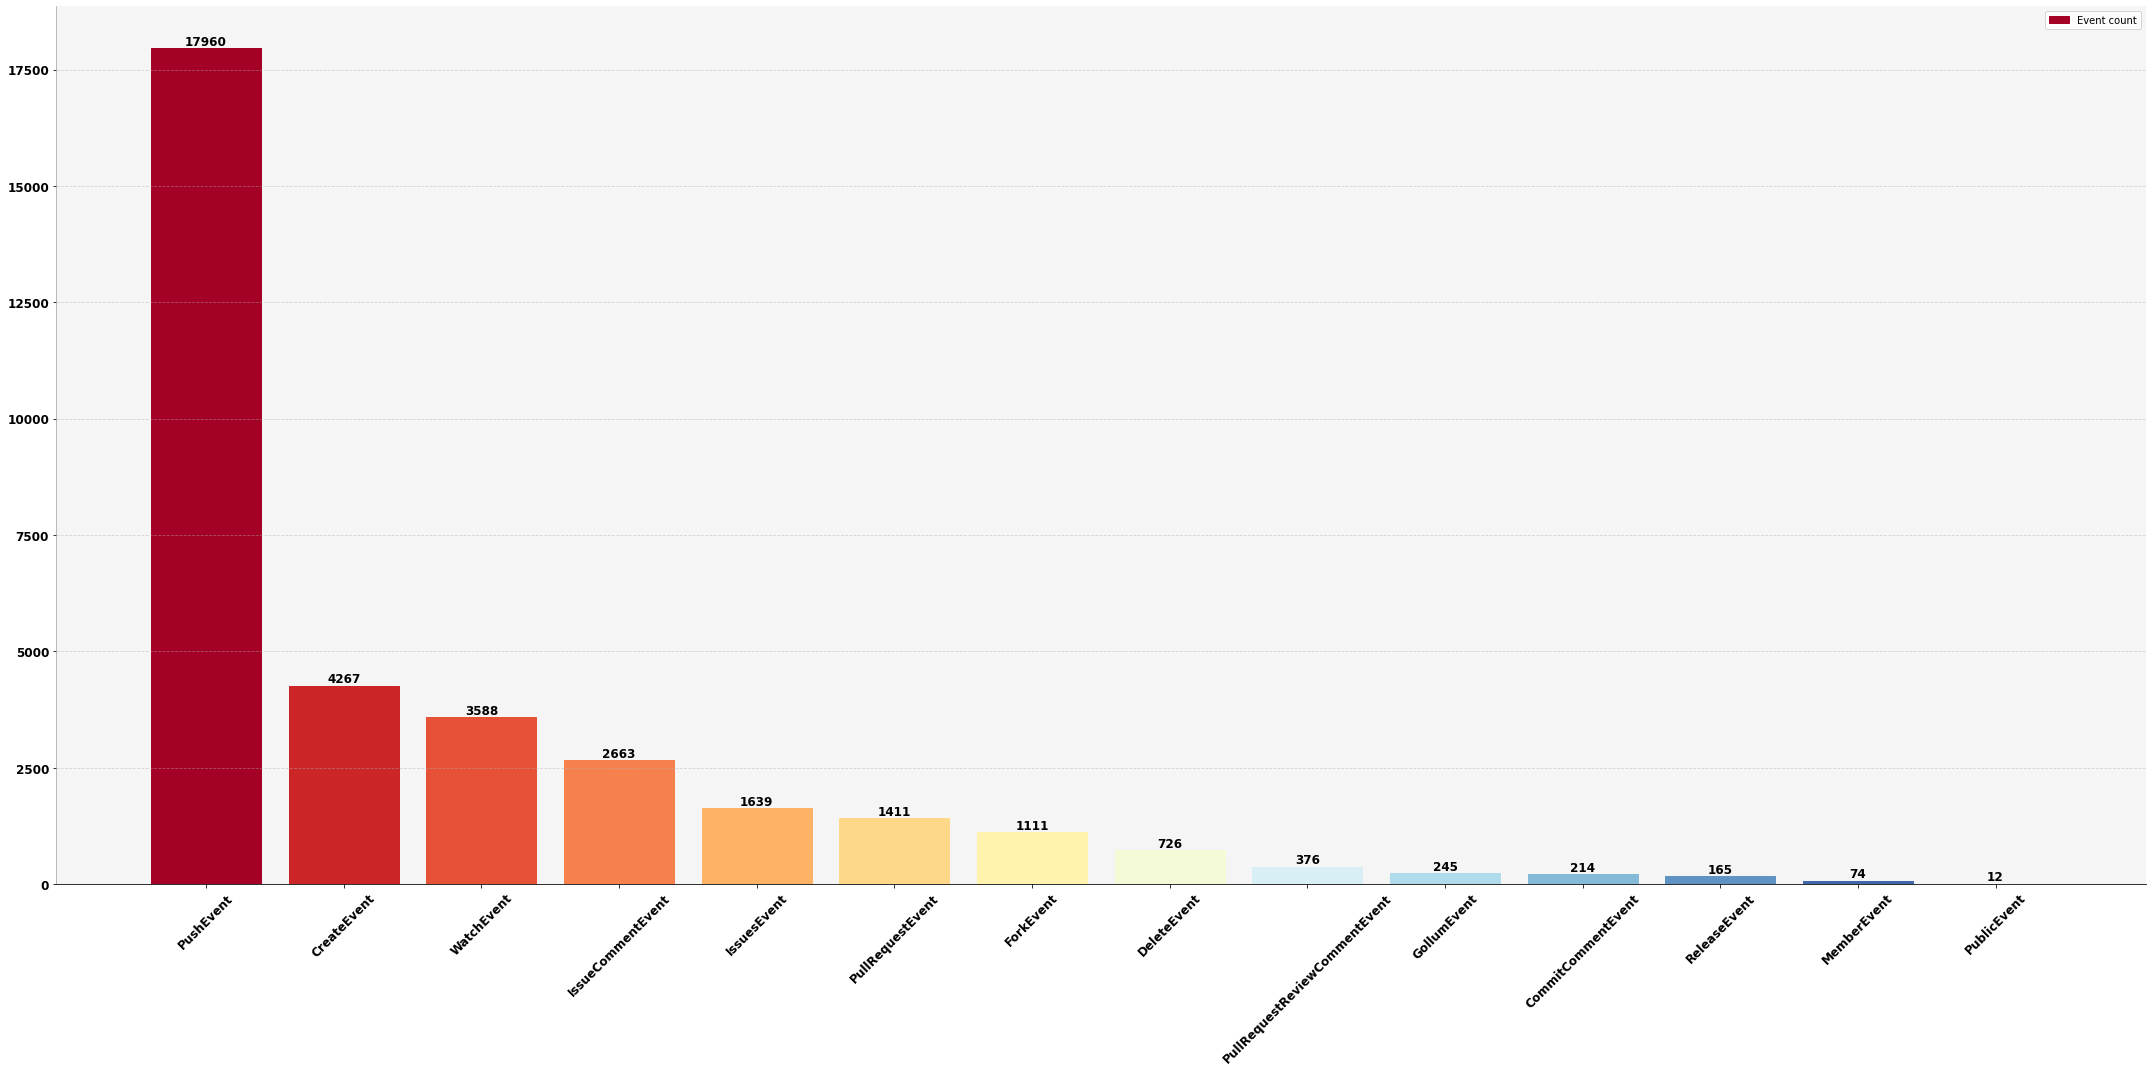

In [0]:
plot_spark_dataframe(sorted_c_event_count)

## ACTOR DATAFRAME

### EVENT OCCURRENCES WITH RESPECT TO TIME (final_actor_table)

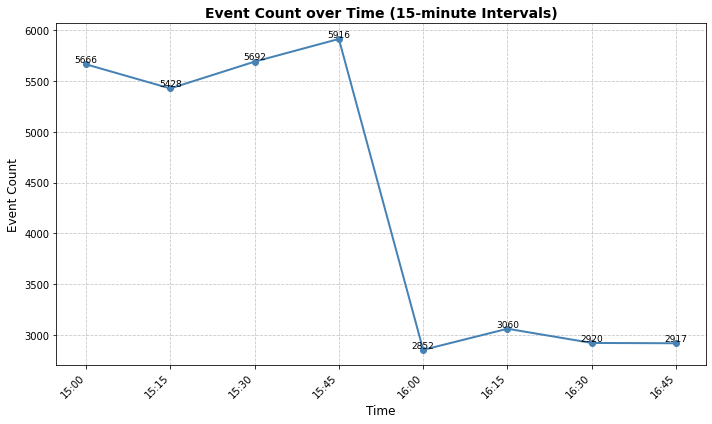

In [0]:
plot_event_count_over_time(final_actor_table)

### TOP 10 USER'S ACTIVITY FREQUENCY

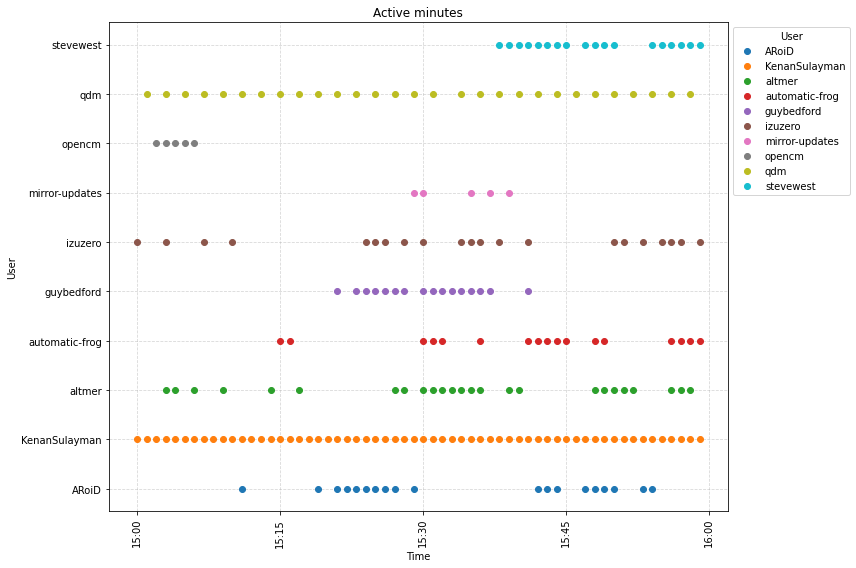

In [0]:
plot_active_minutes_by_top_users(final_actor_table)

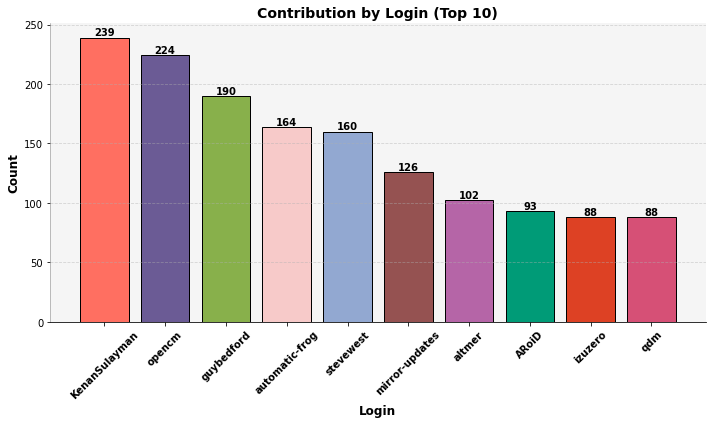

In [0]:
plot_top_logins(final_actor_table)

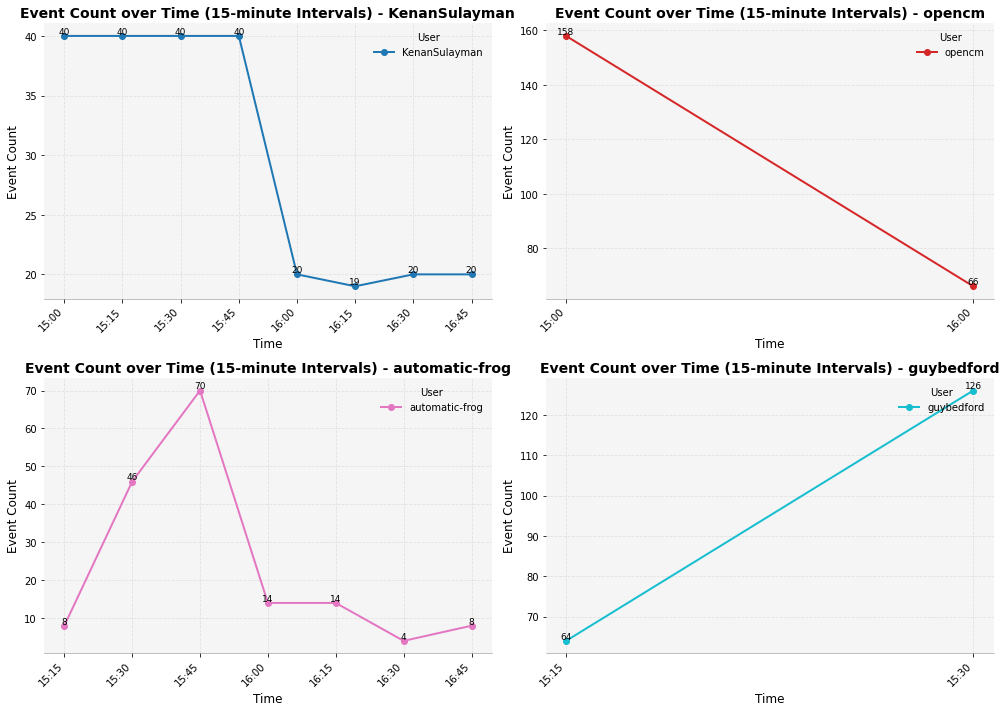

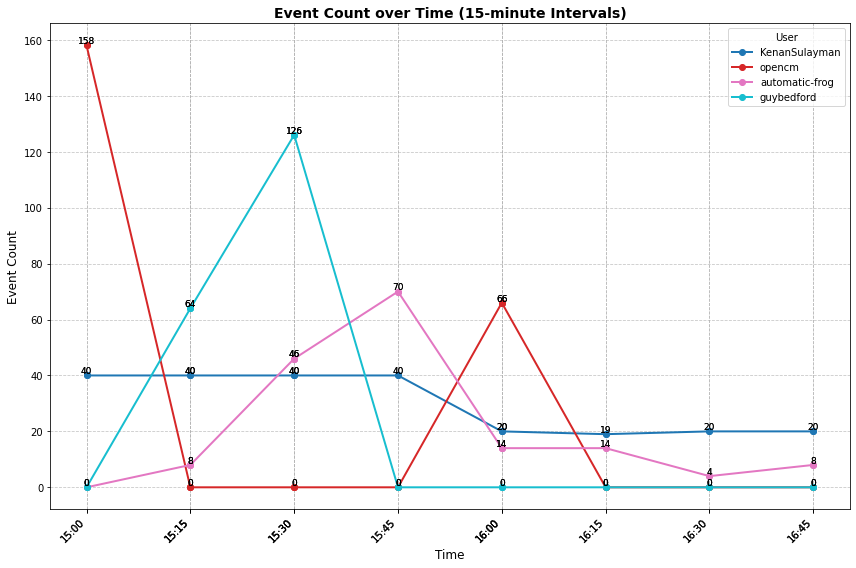

In [0]:
plot_individual_event_counts(final_actor_table, ["KenanSulayman", "opencm", "guybedford", "automatic-frog"])
plot_event_counts(final_actor_table, ["KenanSulayman", "opencm", "guybedford", "automatic-frog"])

### ORGANIZATION DATAFRAME

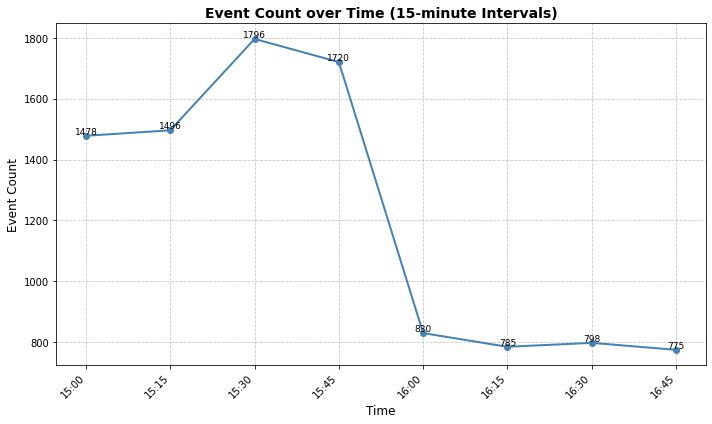

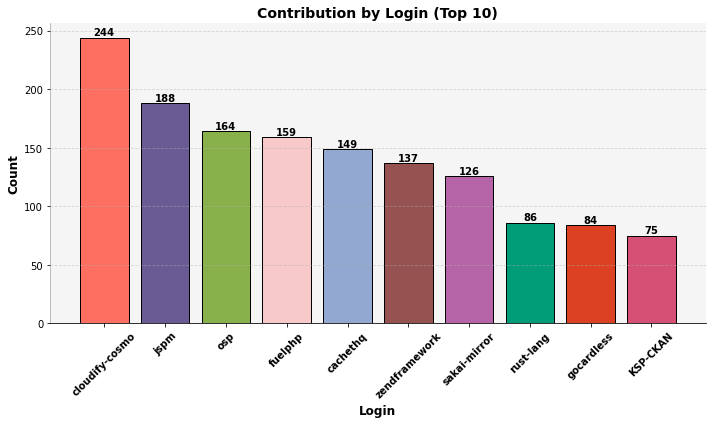

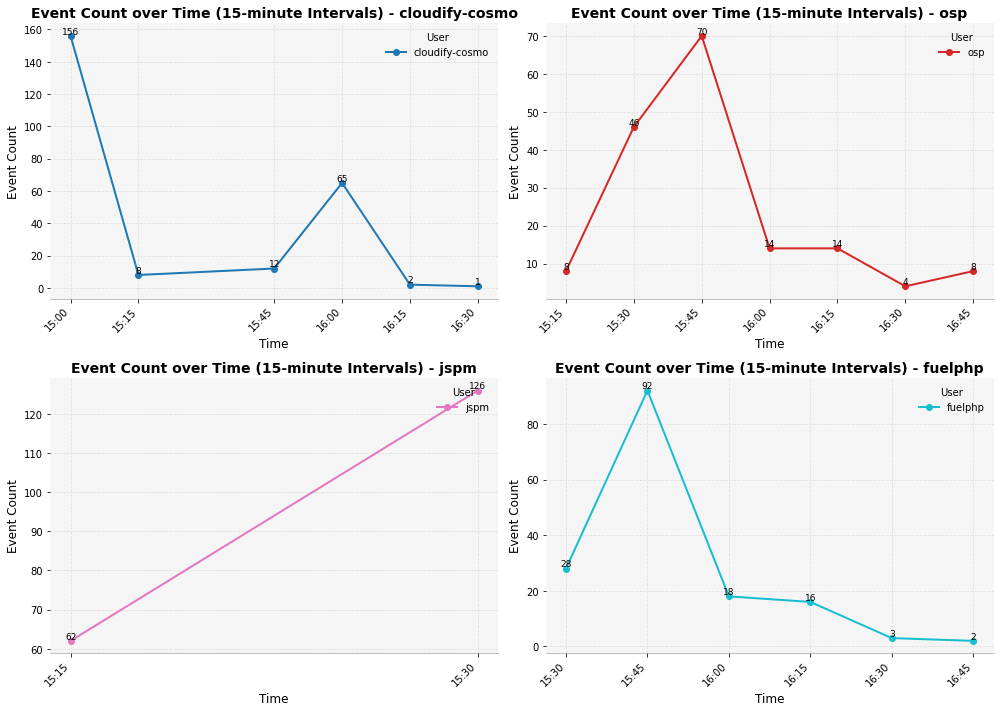

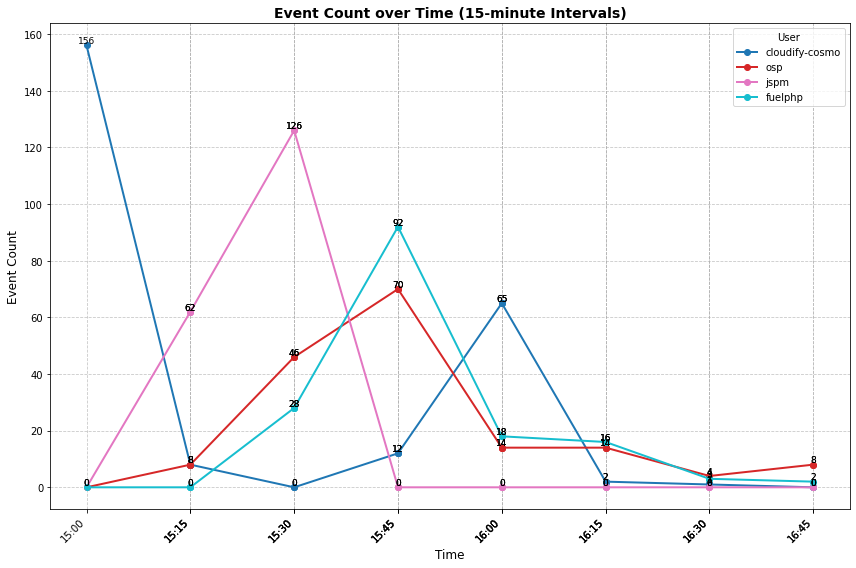

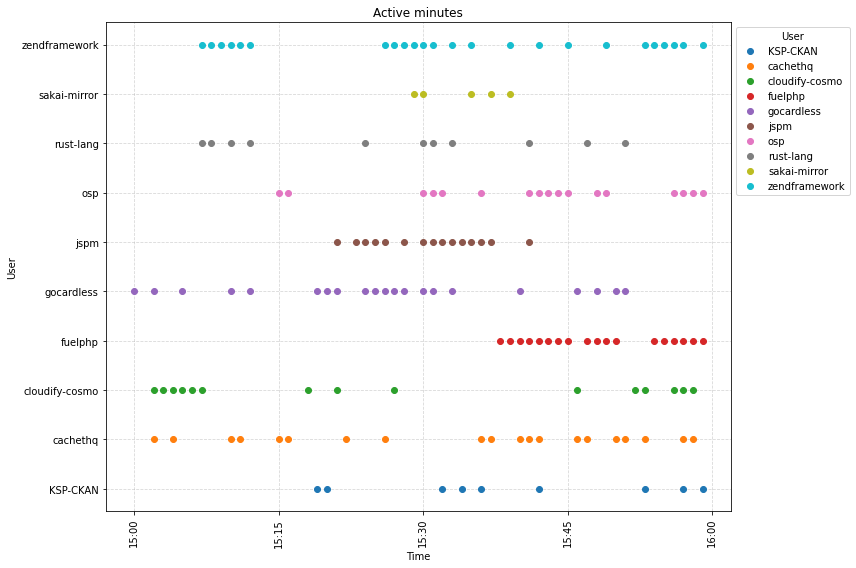

In [0]:
plot_event_count_over_time(final_org_table)
plot_top_logins(final_org_table)
plot_individual_event_counts(final_org_table, ["cloudify-cosmo", "jspm", "osp", "fuelphp"])
plot_event_counts(final_org_table, ["cloudify-cosmo", "jspm", "osp", "fuelphp"])
plot_active_minutes_by_top_users(final_org_table)

## REPOSITORY DATAFRAME

In [0]:
final_repo_table_renamed = final_repo_table.withColumnRenamed("name", "login")

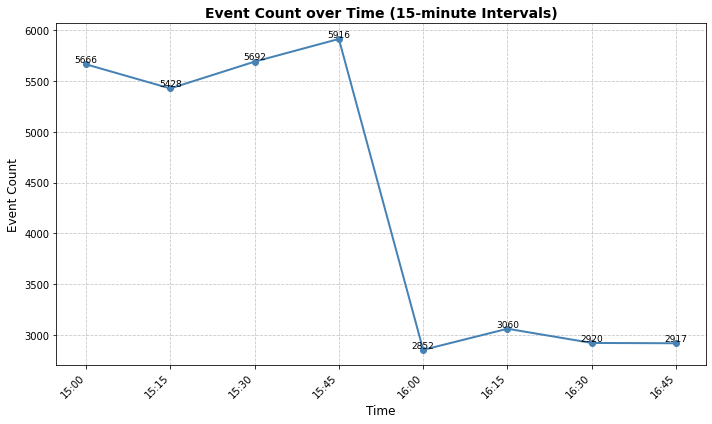

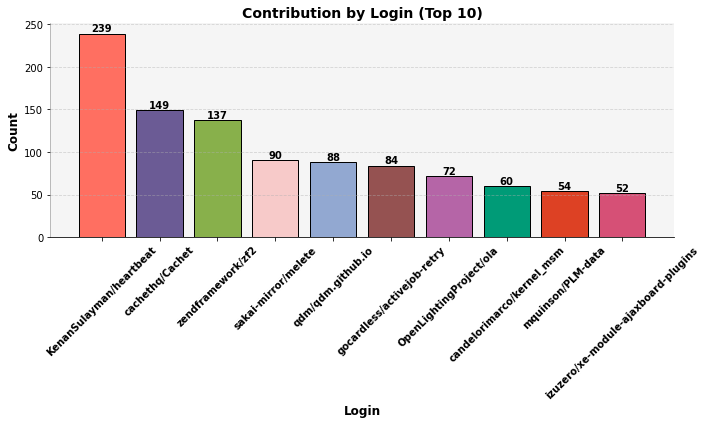

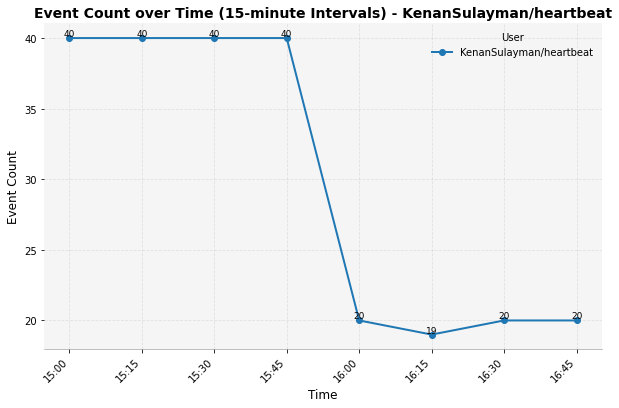

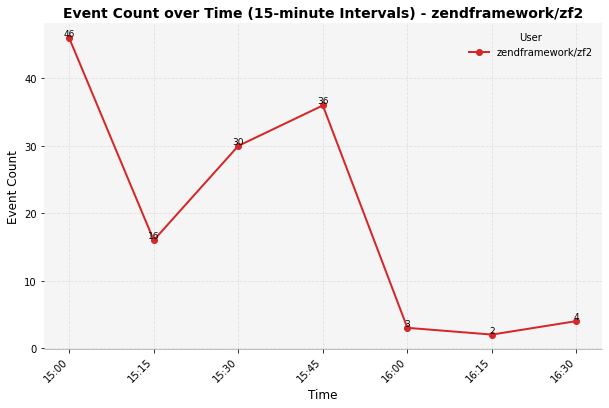

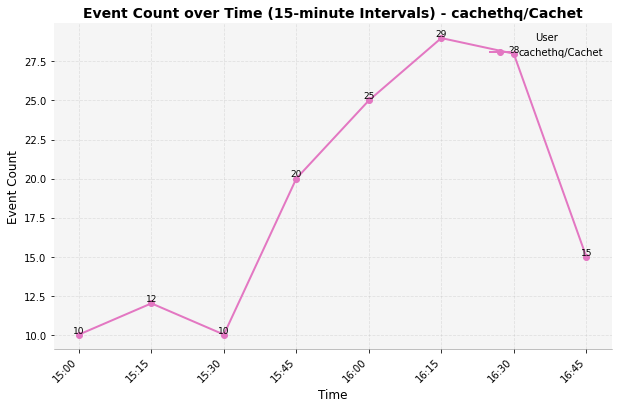

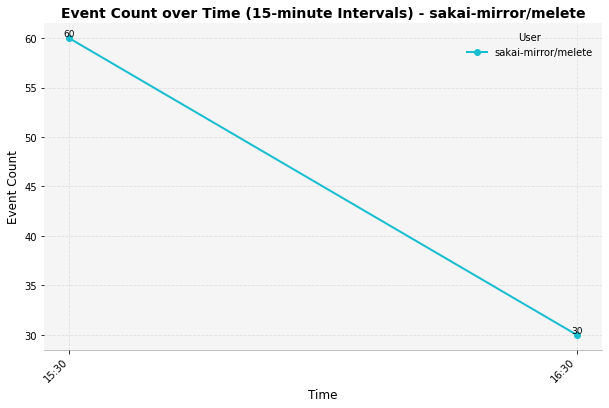

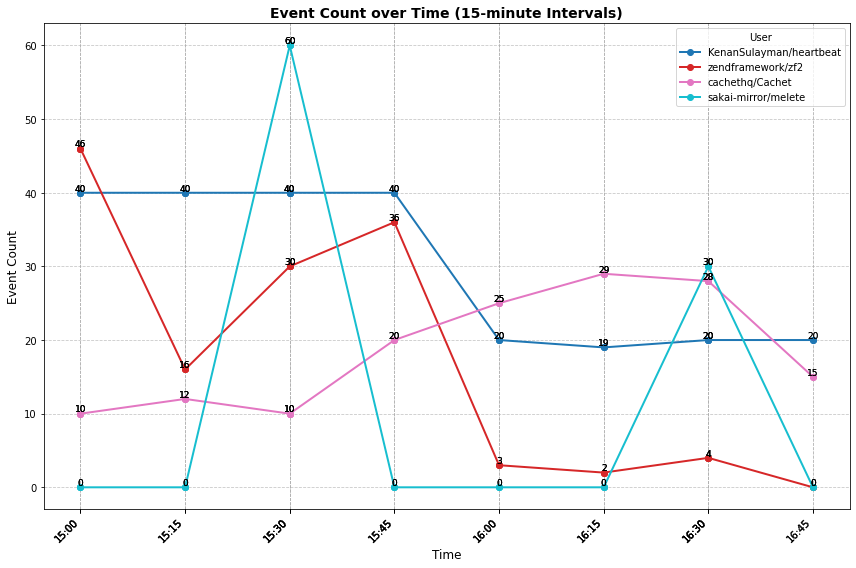

In [0]:
plot_event_count_over_time(final_repo_table)
plot_top_logins(final_repo_table_renamed)
plot_individual_event_counts_name(final_repo_table, ["KenanSulayman/heartbeat", "cachethq/Cachet", "zendframework/zf2", "sakai-mirror/melete"])
plot_event_counts(final_repo_table_renamed, ["KenanSulayman/heartbeat", "cachethq/Cachet", "zendframework/zf2", "sakai-mirror/melete"])

# PAYLOAD DATAFRAME

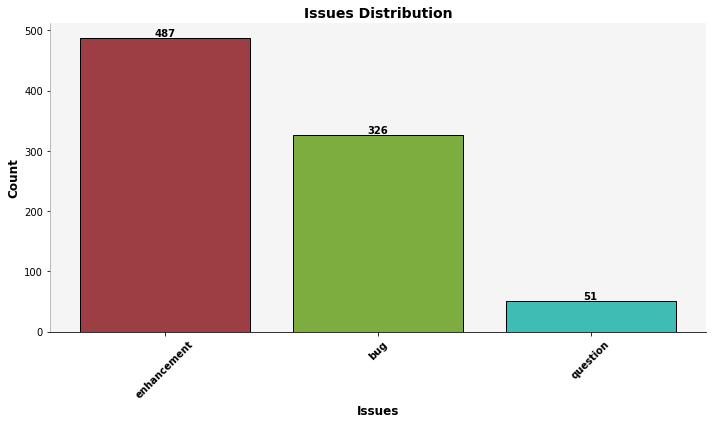

In [0]:
plot_top_issues(combined_categories_df)

# BUGS DATAFRAME

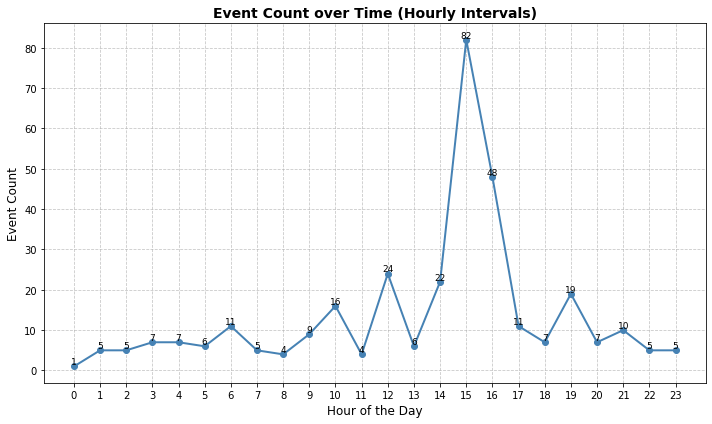

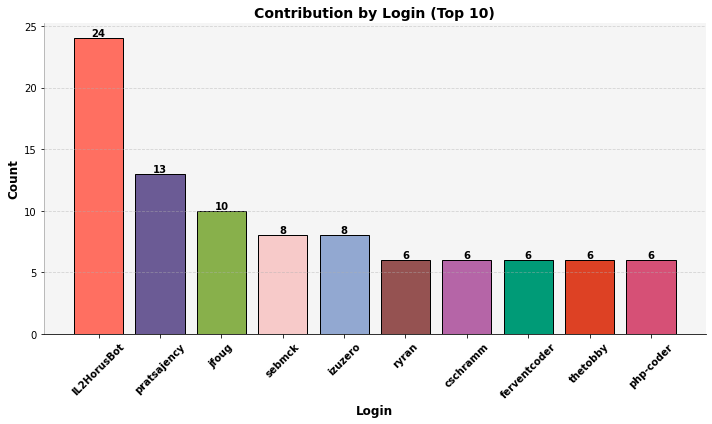

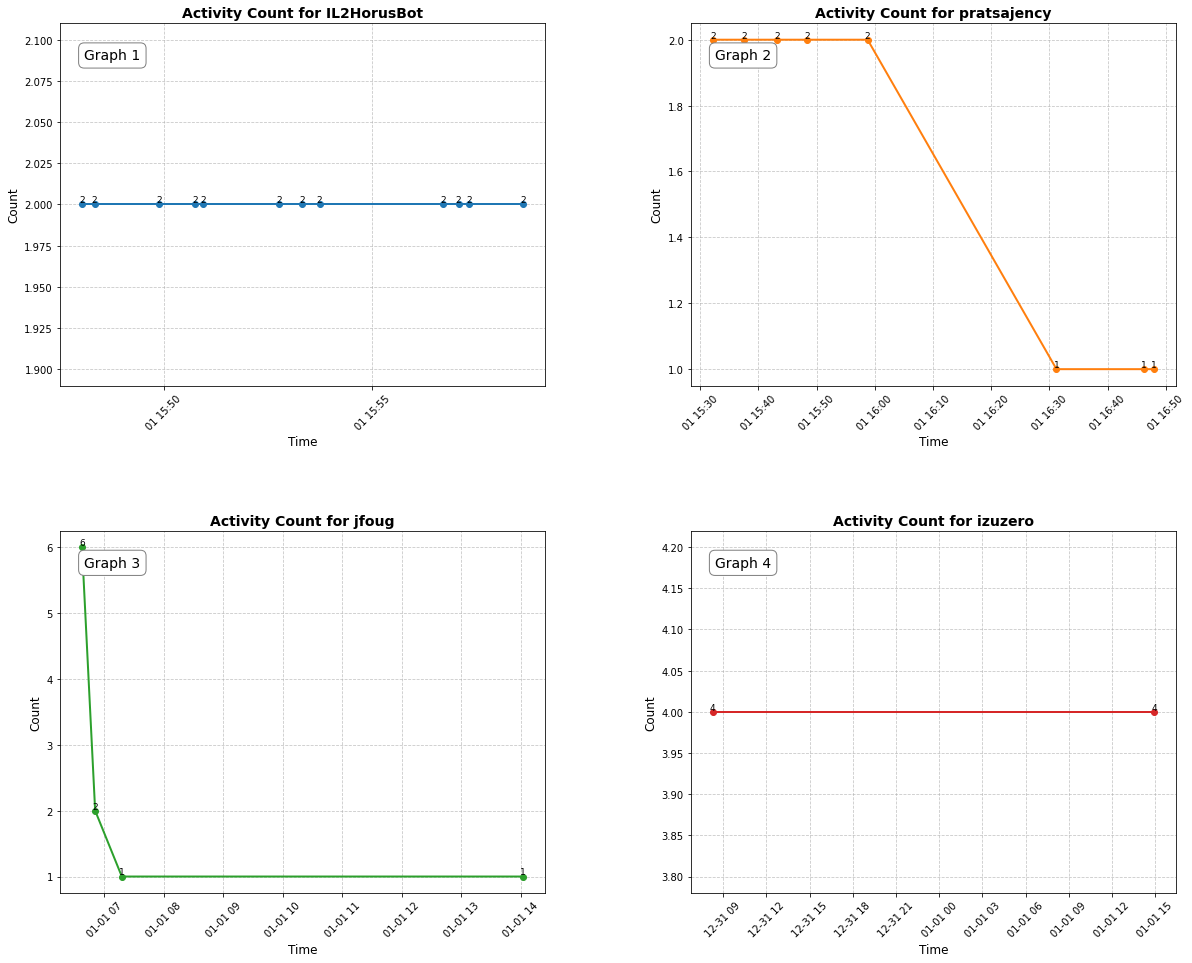

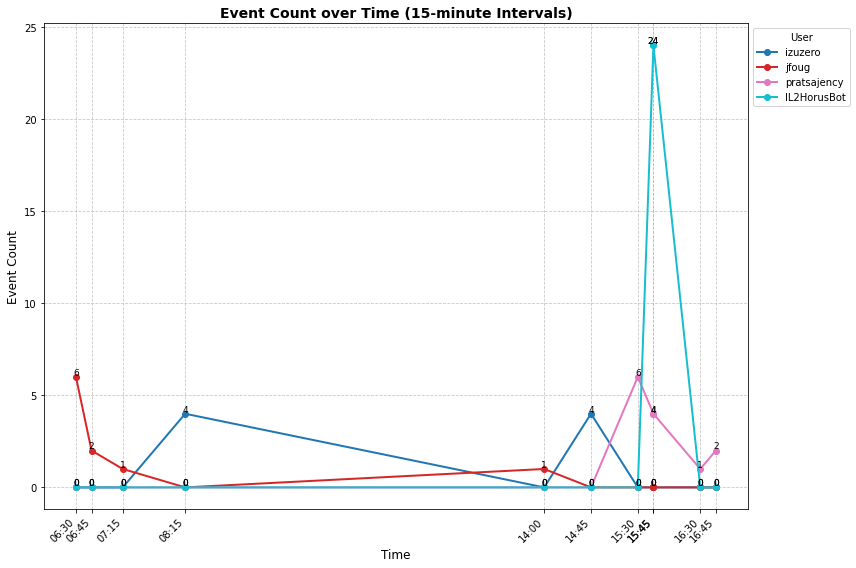

In [0]:
plot_event_count(final_bugs_df)
plot_top_logins(final_bugs_df)
plotting_time_graph(final_bugs_df, "IL2HorusBot", "pratsajency", "jfoug", "izuzero")
plot_event_counts(final_bugs_df, ["IL2HorusBot", "pratsajency", "jfoug", "izuzero"])

# ENHANCEMENT/FEATURE DATAFRAME

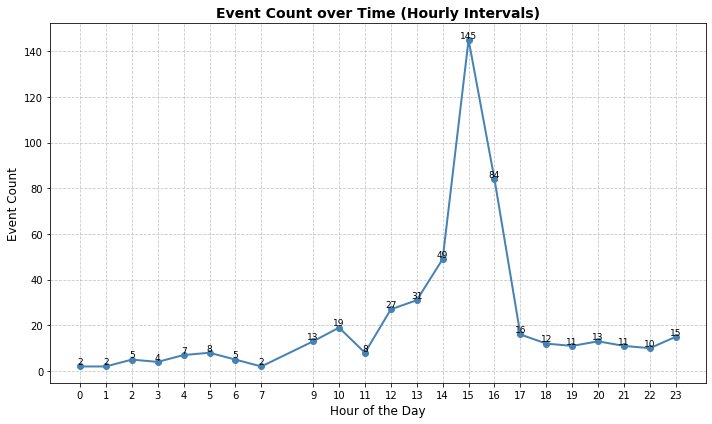

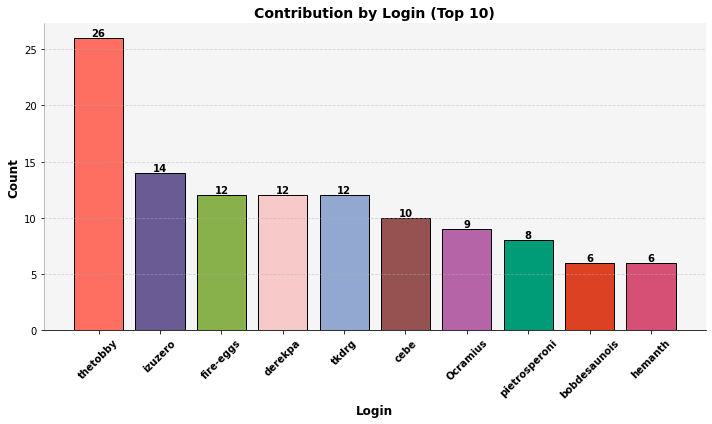

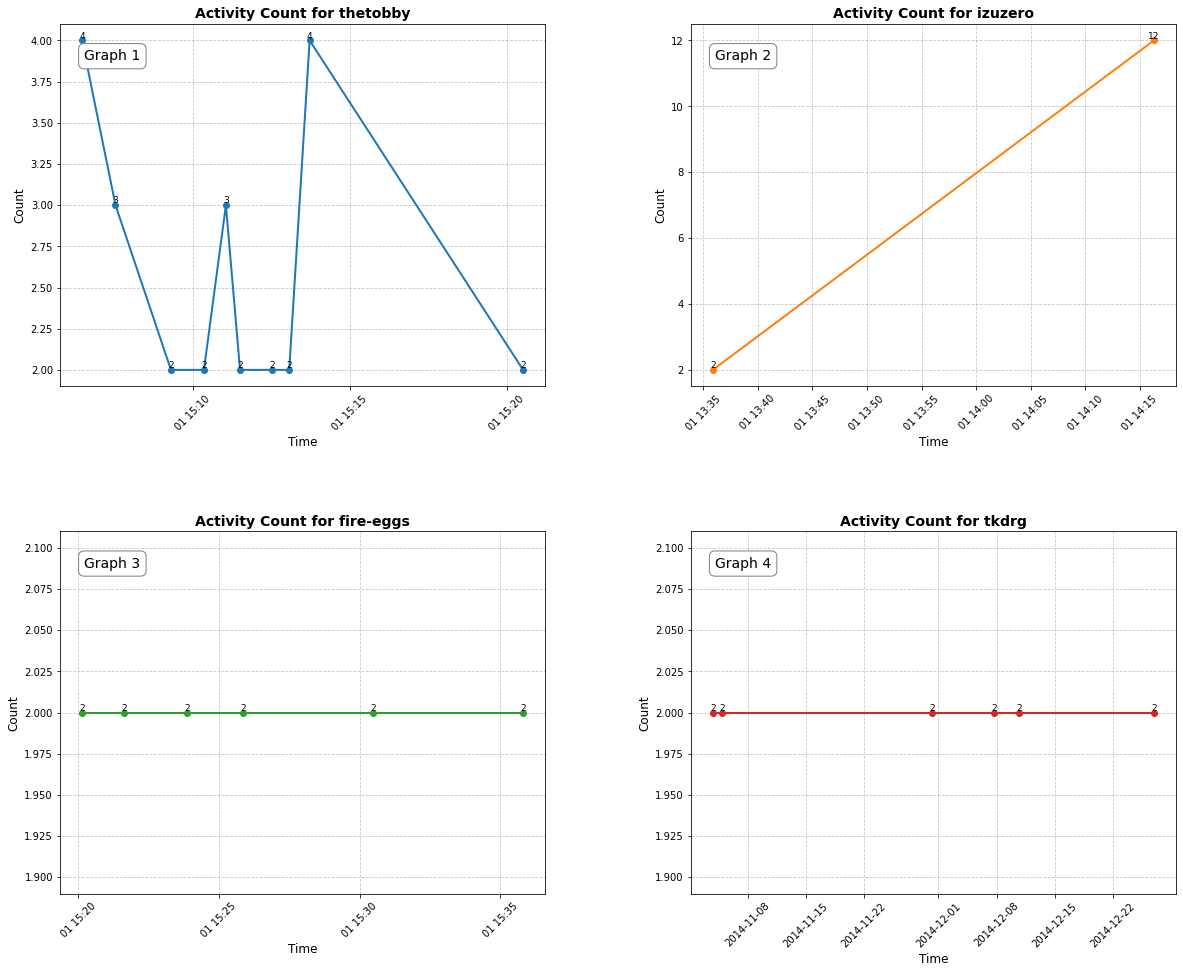

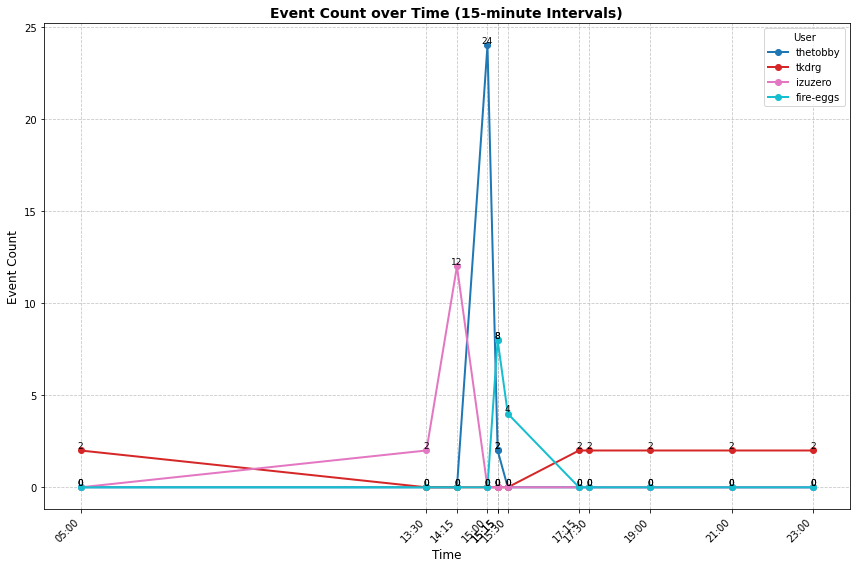

In [0]:
plot_event_count(final_enhancement_df)
plot_top_logins(final_enhancement_df)
plotting_time_graph(final_enhancement_df, "thetobby", "izuzero", "fire-eggs", "tkdrg")
plot_event_counts(final_enhancement_df, ["thetobby", "izuzero", "fire-eggs", "tkdrg"])

# QUESTION DATAFRAME

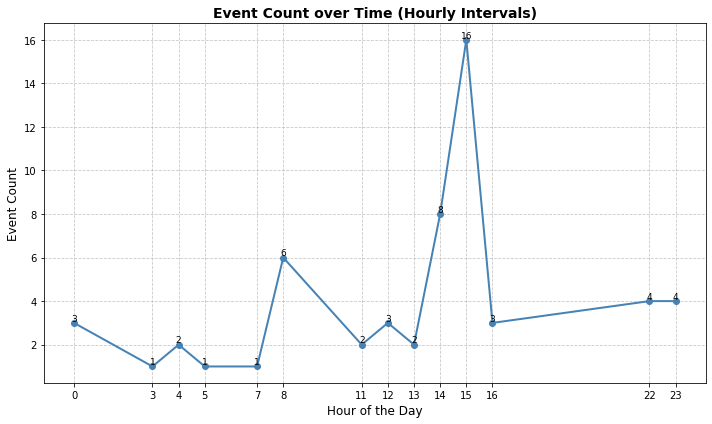

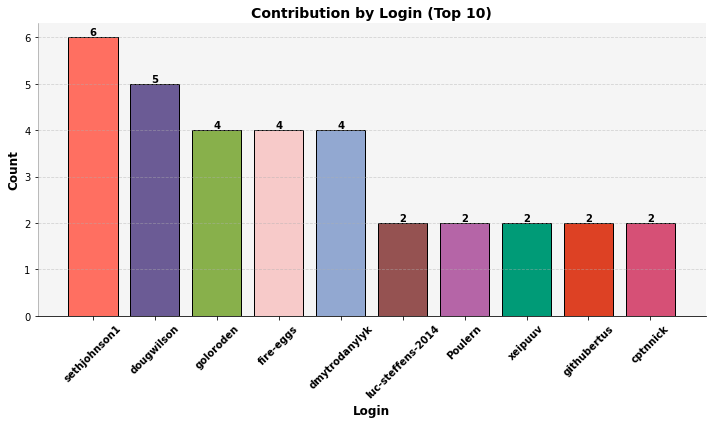

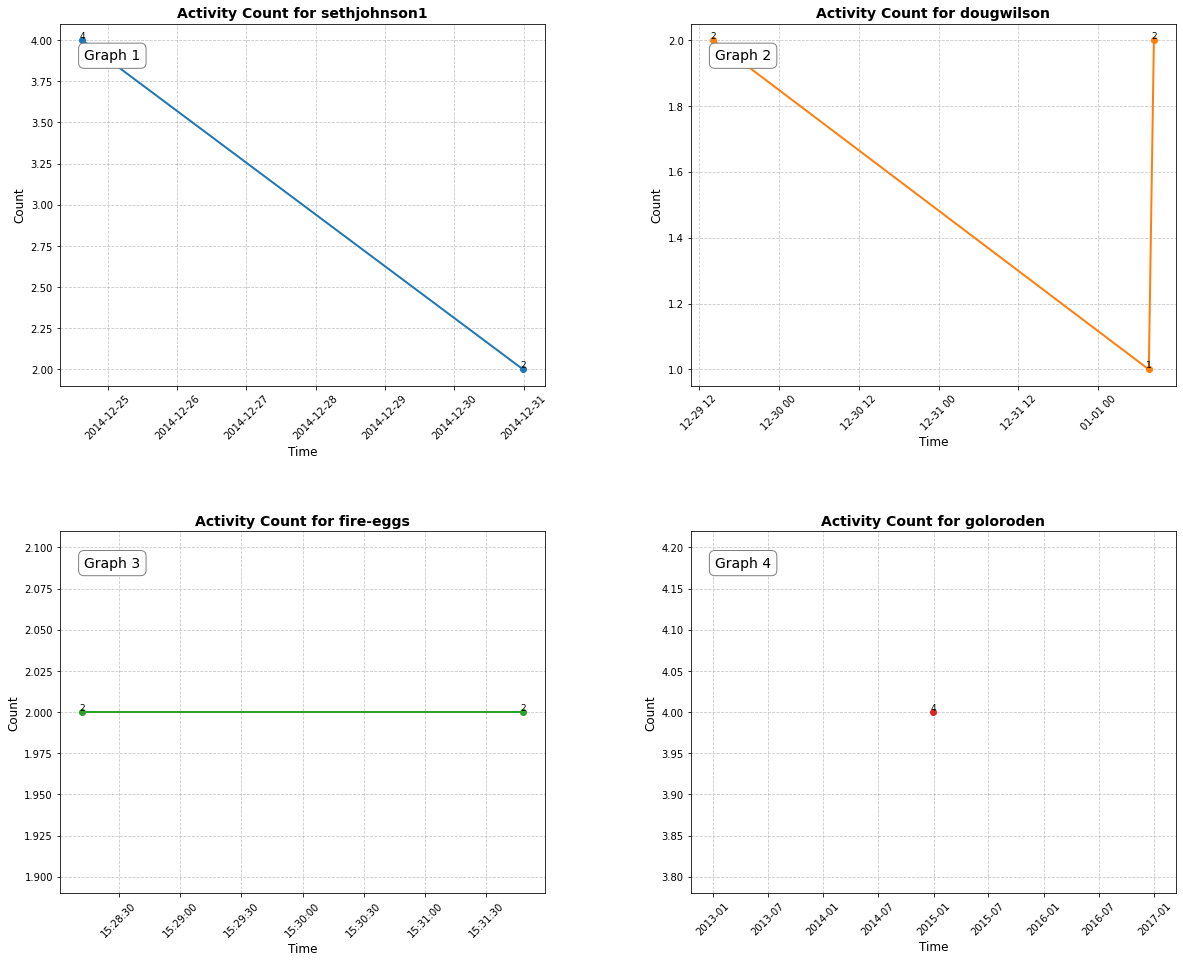

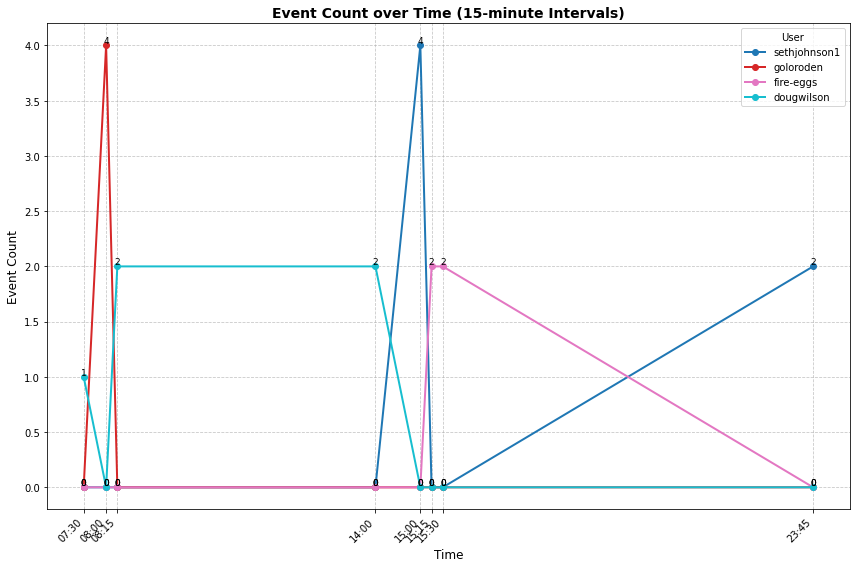

In [0]:
plot_event_count(final_question_df)
plot_top_logins(final_question_df)
plotting_time_graph(final_question_df, "sethjohnson1", "dougwilson", "fire-eggs", "goloroden")
plot_event_counts(final_question_df, ["sethjohnson1", "dougwilson", "fire-eggs", "goloroden"])